<a href="https://colab.research.google.com/github/murillodomingos/Speed-Dating/blob/main/SpeedDating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Trabalho 1° semestre Fundamentos em Ciência de Dados**

*   **Prof**: Diego Furtado
*   **Participantes**: Murillo Domingos de Almeida, Bruno Neves Boa Sorte, Caio Uramoto Evangelista



##Configurações do ambiente

In [ ]:
!pip install openml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import de bibliotecas e predefinições do comportamento delas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot') #estilo padrão
pd.options.display.max_columns = None #máximo de colunas
pd.options.display.max_rows = None #máximo de linhas

In [ ]:
#leitura dataframe
import openml

dataset_id = 40536
dataset = openml.datasets.get_dataset(40536)


#df - dataframe com as instâncias
#y - array com a variável alvo

df,y,_,_ = dataset.get_data(dataset_format="dataframe",target=dataset.default_target_attribute)

##EDA - I

###Verificações iniciais

In [ ]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: match, dtype: category
Categories (2, object): ['0' < '1']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 120 entries, has_null to met
dtypes: category(61), float64(57), uint8(2)
memory usage: 4.2 MB


In [ ]:
df.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met
0,0,1,female,21.0,27.0,6,[4-6],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,[2-5],[2-5],Law,35.0,20.0,20.0,20.0,0.0,5.0,[21-100],[16-20],[16-20],[16-20],[0-15],[0-15],6.0,8.0,8.0,8.0,8.0,6.0,[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],15.0,20.0,20.0,15.0,15.0,15.0,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6.0,8.0,8.0,8.0,7.0,[6-8],[6-8],[6-8],[6-8],[6-8],6.0,9.0,7.0,7.0,6.0,5.0,[6-8],[9-10],[6-8],[6-8],[6-8],[0-5],9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.14,[0-0.33],3.0,2.0,4.0,[0-4],[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0
1,0,1,female,21.0,22.0,1,[0-1],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,[2-5],[2-5],Law,60.0,0.0,0.0,40.0,0.0,0.0,[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],7.0,8.0,10.0,7.0,7.0,5.0,[6-8],[6-8],[9-10],[6-8],[6-8],[0-5],15.0,20.0,20.0,15.0,15.0,15.0,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6.0,8.0,8.0,8.0,7.0,[6-8],[6-8],[6-8],[6-8],[6-8],7.0,8.0,7.0,8.0,5.0,6.0,[6-8],[6-8],[6-8],[6-8],[0-5],[6-8],9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.54,[0.33-1],3.0,2.0,4.0,[0-4],[0-3],[3-5],7.0,5.0,[6-8],[5-6],1.0
2,1,1,female,21.0,22.0,1,[0-1],Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1,2.0,4.0,[2-5],[2-5],Law,19.0,18.0,19.0,18.0,14.0,12.0,[16-20],[16-20],[16-20],[16-20],[0-15],[0-15],10.0,10.0,10.0,10.0,10.0,10.0,[9-10],[9-10],[9-10],[9-10],[9-10],[9-10],15.0,20.0,20.0,15.0,15.0,15.0,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6.0,8.0,8.0,8.0,7.0,[6-8],[6-8],[6-8],[6-8],[6-8],5.0,8.0,9.0,8.0,5.0,7.0,[0-5],[6-8],[9-10],[6-8],[0-5],[6-8],9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.16,[0-0.33],3.0,2.0,4.0,[0-4],[0-3],[3-5],7.0,NaN,[6-8],[0-4],1.0
3,0,1,female,21.0,23.0,2,[2-3],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,[2-5],[2-5],Law,30.0,5.0,15.0,40.0,5.0,5.0,[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],7.0,8.0,9.0,8.0

In [ ]:
df.describe()

,wave,age,age_o,d_age,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met
count,8378.000000,8283.000000,8274.000000,8378.000000,8299.000000,8299.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8220.000000,8277.000000,1800.000000,7205.000000,8138.000000,8069.000000,8003.000000
mean,11.350919,26.358928,26.364999,4.185605,3.784793,3.651645,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,22.514632,17.396389,20.265613,17.457043,10.682539,11.845111,7.084733,8.294935,7.704460,8.403965,7.578388,6.189995,7.175164,7.368597,6.400598,6.777524,5.474559,6.425232,4.575491,6.245813,7.783829,6.985781,6.714544,5.737077,3.881191,5.745993,7.678515,5.304133,6.776118,7.919629,6.825401,7.851066,5.631281,4.339197,0.196010,5.534131,5.570556,3.207814,6.134087,5.207523,0.049856
std,5.995903,3.566763,3.563648,4.596171,2.845708,2.805237,12.569802,7.044003,6.782895,6.085526,6.126544,6.362746,1.950305,1.740575,1.550501,1.954078,1.794080,2.156163,12.587674,7.046700,6.783003,6.085239,6.124888,6.362154,1.395783,1.407460,1.564321,1.076608,1.778315,1.950169,1.740315,1.550453,1.953702,1.794055,2.156363,2.619024,2.801874,2.418858,1.754868,2.052232,2.263407,2.570207,2.620507,2.502218,2.006565,2.529135,2.235152,1.700927,2.156283,1.791827,2.608913,2.717612,0.303539,1.734059,4.762569,2.444813,1.841285,2.129565,0.282168
min,1.000000,18.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-0.830000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,24.000000,24.000000,1.000000,1.000000,1.000000,15.000000,15.000000,17.390000,15.000000,5.000000,9.520000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,15.000000,15.000000,17.390000,15.000000,5.000000,9.520000,6.000000,8.000000,7.000000,8.000000,7.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,4.000000,2.000000,5.000000,7.000000,6.000000,5.000000,4.000000,2.000000,4.000000,7.000000,3.000000,5.000000,7.000000,5.000000,7.000000,4.000000,2.000000,-0.020000,5.000000,2.000000,2.000000,5.000000,4.000000,0.000000
50%,11.000000,26.000000,26.000000,3.000000,3.000000,3.000000,20.000000,18.370000,20.000000,18.000000,10.000000,10.640000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,20.000000,18.180000,20.000000,18.000000,10.000000,10.640000,7.000000,8.000000,8.000000,8.000000,8.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000

In [ ]:
df.dtypes

has_null                           category
wave                                  uint8
gender                             category
age                                 float64
age_o                               float64
d_age                                 uint8
d_d_age                            category
race                               category
race_o                             category
samerace                           category
importance_same_race                float64
importance_same_religion            float64
d_importance_same_race             category
d_importance_same_religion         category
field                              category
pref_o_attractive                   float64
pref_o_sincere                      float64
pref_o_intelligence                 float64
pref_o_funny                        float64
pref_o_ambitious                    float64
pref_o_shared_interests             float64
d_pref_o_attractive                category
d_pref_o_sincere                

In [ ]:
df.columns.tolist()

['has_null',
 'wave',
 'gender',
 'age',
 'age_o',
 'd_age',
 'd_d_age',
 'race',
 'race_o',
 'samerace',
 'importance_same_race',
 'importance_same_religion',
 'd_importance_same_race',
 'd_importance_same_religion',
 'field',
 'pref_o_attractive',
 'pref_o_sincere',
 'pref_o_intelligence',
 'pref_o_funny',
 'pref_o_ambitious',
 'pref_o_shared_interests',
 'd_pref_o_attractive',
 'd_pref_o_sincere',
 'd_pref_o_intelligence',
 'd_pref_o_funny',
 'd_pref_o_ambitious',
 'd_pref_o_shared_interests',
 'attractive_o',
 'sinsere_o',
 'intelligence_o',
 'funny_o',
 'ambitous_o',
 'shared_interests_o',
 'd_attractive_o',
 'd_sinsere_o',
 'd_intelligence_o',
 'd_funny_o',
 'd_ambitous_o',
 'd_shared_interests_o',
 'attractive_important',
 'sincere_important',
 'intellicence_important',
 'funny_important',
 'ambtition_important',
 'shared_interests_important',
 'd_attractive_important',
 'd_sincere_important',
 'd_intellicence_important',
 'd_funny_important',
 'd_ambtition_important',
 'd_share

###Primeiras análises com os dados não tratados

In [ ]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: match, dtype: category
Categories (2, object): ['0' < '1']

In [ ]:
y.describe()

count     8378
unique       2
top          0
freq      6998
Name: match, dtype: object

In [ ]:
y.value_counts()

0    6998
1    1380
Name: match, dtype: int64

In [ ]:
y.isnull().sum()

0

In [ ]:
df['met'].value_counts()

0.0    7644
1.0     351
7.0       3
5.0       2
3.0       1
8.0       1
6.0       1
Name: met, dtype: int64

Relação entre a atratividade e a idade

Text(0.5, 1.0, 'Relação entre Idade e Atratividade')

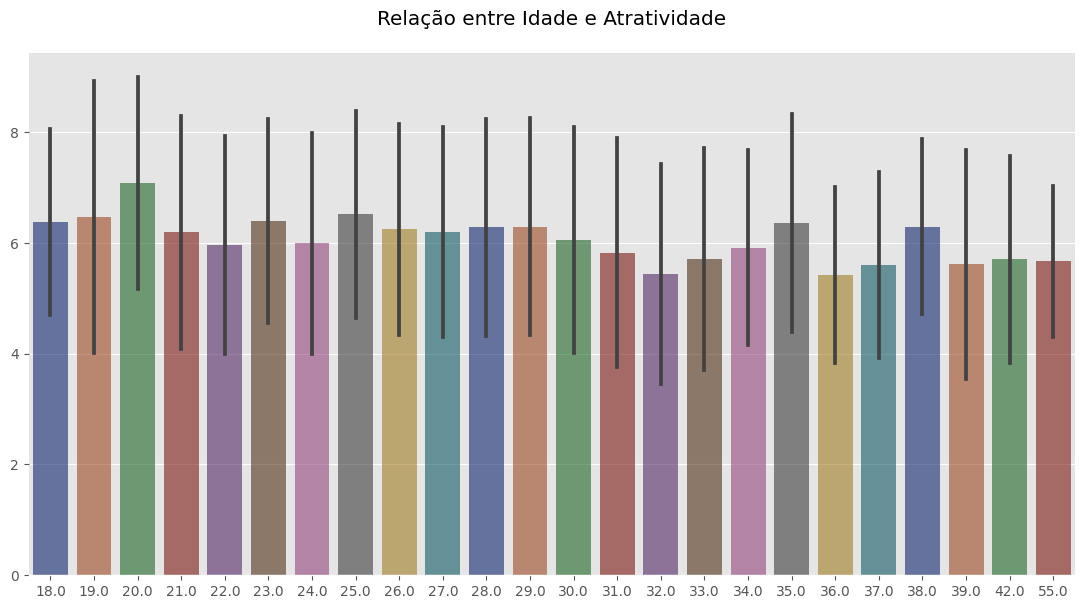

In [ ]:
g = sns.catplot(
    data=df, kind="bar",
    x="age", y="attractive_o",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("","")
g.fig.set_size_inches(12, 6)
plt.title("Relação entre Idade e Atratividade", pad=20)

Verificação de outlier nas idades


Text(0.5, 1.0, 'Verificação de Outlier em Idade')

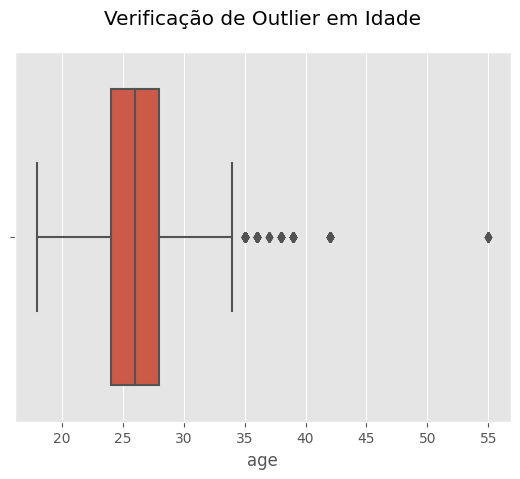

In [ ]:
sns.boxplot(data=df, x='age')
plt.title("Verificação de Outlier em Idade", pad=20)

Distribuição de idades e localização de sua concentração


Text(0.5, 1.0, 'Concentração de Idades dos participantes')

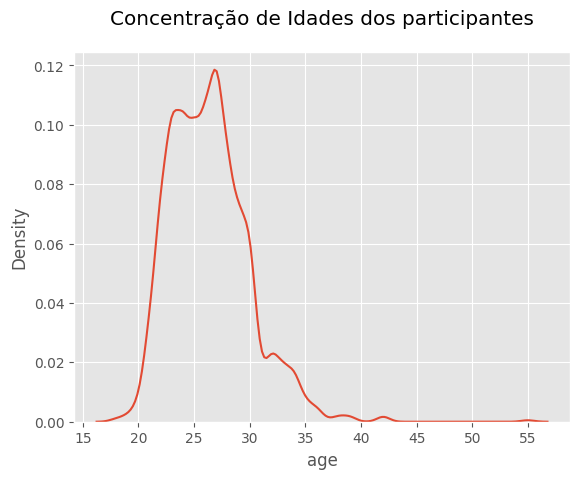

In [ ]:
sns.kdeplot(data=df, x='age')
plt.title("Concentração de Idades dos participantes", pad=20)

In [ ]:
df['gender'].value_counts()

male      4194
female    4184
Name: gender, dtype: int64

In [ ]:
df['age'].value_counts()

27.0    1059
23.0     894
26.0     869
24.0     863
25.0     837
28.0     746
22.0     655
29.0     589
30.0     574
21.0     291
32.0     210
33.0     161
34.0     152
31.0     125
35.0      60
20.0      55
36.0      45
19.0      20
42.0      20
38.0      19
39.0      18
18.0      10
55.0       6
37.0       5
Name: age, dtype: int64

In [ ]:
df['race'].value_counts()

European/Caucasian-American              4727
Asian/Pacific Islander/Asian-American    1982
Latino/Hispanic American                  664
Other                                     522
Black/African American                    420
Name: race, dtype: int64

Text(0.5, 1.0, 'Relação de likes de acordo com a etnia do parceiro')

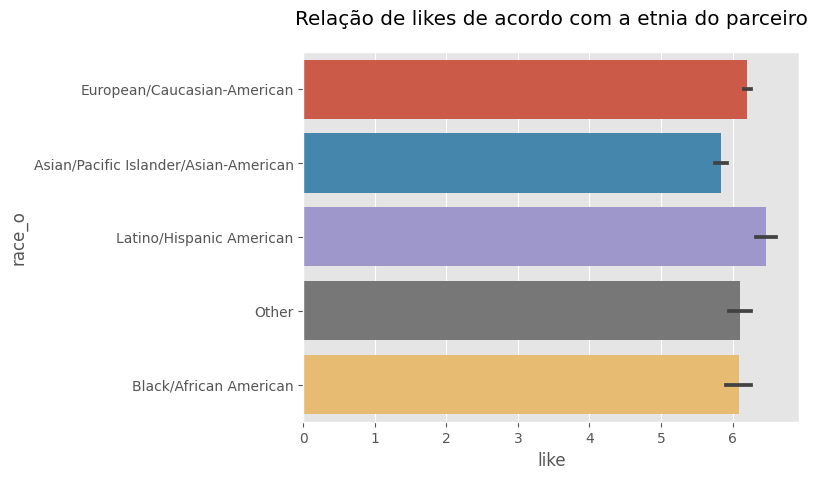

In [ ]:
sns.barplot(data = df, x='like', y='race_o')
plt.title("Relação de likes de acordo com a etnia do parceiro", pad=20)

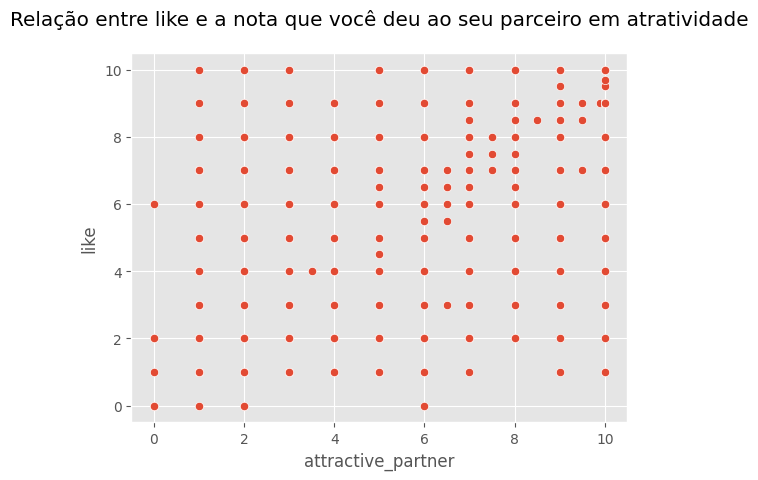

In [ ]:
sns.scatterplot(data=df, x='attractive_partner', y='like')
plt.title("Relação entre like e a nota que você deu ao seu parceiro em atratividade", pad=20)
plt.show()

##Pré-processamento


###Tratamento dos dados

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.loc[df.duplicated()]

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met


intervalos de idade definidos a partir de proximidade biológicas e intelectuais.


In [ ]:
limites = [18, 25, 32, 40, 55]
rotulos = ['18-25', '26-32', '33-40', '41+']
df['age_group'] = pd.cut(df['age'], bins=limites, labels=rotulos, right=False)

In [ ]:
df.groupby('age_group').describe()

wave                                                      age  \
            count       mean       std  min  25%   50%   75%   max   count   
age_group                                                                    
18-25      2788.0  10.845768  6.605270  1.0  5.0  11.0  15.0  21.0  2788.0   
26-32      4799.0  11.578871  5.778240  1.0  7.0  11.0  15.0  21.0  4799.0   
33-40       670.0  11.777612  4.531877  4.0  9.0  12.0  14.0  21.0   670.0   
41+          20.0   9.000000  0.000000  9.0  9.0   9.0   9.0   9.0    20.0   

                                                               age_o  \
                mean       std   min   25%   50%   75%   max   count   
age_group                                                              
18-25      22.760043  1.134397  18.0  22.0  23.0  24.0  24.0  2744.0   
26-32      27.334028  1.705101  25.0  26.0  27.0  29.0  31.0  4750.0   
33-40      33.626866  1.705840  32.0  32.0  33.0  34.0  39.0   660.0   
41+        42.000000  0.000000  42.0  42.0  42.0  42.0  42.0    20.0   

                                                                 d_age  \
                mean       std   min    25%   50%    75%   max   count   
age_group                                                                
18-25      25.938776  3.577776  18.0  23.00  26.0  28.00  55.0  2788.0   
26-32      26.522316  3.471908  20.0  24.00  26.0  28.75  55.0  4799.0   
33-40      27.009091  3.882560  20.0  24.00  27.0  29.00  55.0   670.0   
41+        25.600000  2.603641  22.0  23.75  25.0  27.25  31.0    20.0   

                                                                \
                mean       std   min    25%   50%    75%   max   
age_group                                                        
18-25       3.872669  3.852957   0.0   1.00   3.0   5.00  32.0   
26-32       3.404251  3.413120   0.0   1.00   3.0   5.00  30.0   
33-40       7.417910  4.817287   0.0   5.00   7.0   9.00  37.0   
41+        16.400000  2.603641  11.0  14.75  17.0  18.25  20.0   

          importance_same_race                                                \
                         count      mean       std  min  25%  50%  75%   max   
age_group                                                                      
18-25                   2788.0  4.119440  2.956158  1.0  1.0  3.0  7.0  10.0   
26-32                   4783.0  3.746184  2.831673  0.0  1.0  3.0  6.0  10.0   
33-40                    670.0  2.789552  2.184100  1.0  1.0  2.0  5.0  10.0   
41+                       20.0  5.000000  0.000000  5.0  5.0  5.0  5.0   5.0   

          importance_same_religion                                          \
                             count      mean       std  min  25%  50%  75%   
age_group                                                                    
18-25                       2788.0  3.815638  2.810945  1.0  1.0  3.0  6.0   
26-32                       4783.0  3.576416  2.823833  1.0  1.0  3.0  6.0   
33-40                        670.0  3.735821  2.631373  1.0  1.0  3.0  6.0   
41+                           20.0  1.000000  0.000000  1.0  1.0  1.0  1.0   

                pref_o_attractive                                        \
            max             count       mean        std    min      25%   
age_group                                                                 
18-25      10.0            2756.0  23.834158  13.217861   0.00  15.0000   
26-32      10.0            4752.0  21.602948  11.889934   0.00  15.0000   
33-40       9.0             661.0  23.059924  13.923784   0.00  15.0000   
41+         1.0              20.0  15.675500   2.068237  11.54  14.5075   

                                 pref_o_sincere                              \
             50%      75%    max          count       mean       std    min   
age_group                                                                     
18-25      20.00  30.0000  100.0         2756.0  17.057431  7.161237   0.00   
26-32      20.00  25.0000  10

Realizando a limpeza de variáveis obsoletas, que não influenciam na variável alvo, ou que se correlacionam identicamente com uma ou mais variável, tornando-as idênticas. Foi criado uma cópia do dataframe original nesse momento para caso fosse preciso sua reutilização.

In [ ]:
df_temp = df[[
# 'has_null',
#  'wave',
#  'gender',
#  'age',
#  'age_o',
#  'd_age',
#  'd_d_age',
#  'race',
#  'race_o',
#  'samerace',
 'importance_same_race',
 'importance_same_religion',
#  'd_importance_same_race',
#  'd_importance_same_religion',
#  'field',
 'pref_o_attractive',
 'pref_o_sincere',
 'pref_o_intelligence',
 'pref_o_funny',
 'pref_o_ambitious',
 'pref_o_shared_interests',
#  'd_pref_o_attractive',
#  'd_pref_o_sincere',
#  'd_pref_o_intelligence',
#  'd_pref_o_funny',
#  'd_pref_o_ambitious',
#  'd_pref_o_shared_interests',
 'attractive_o',
 'sinsere_o',
 'intelligence_o',
 'funny_o',
 'ambitous_o',
#  'shared_interests_o',
#  'd_attractive_o',
#  'd_sinsere_o',
#  'd_intelligence_o',
#  'd_funny_o',
#  'd_ambitous_o',
#  'd_shared_interests_o',
#  'attractive_important',
 'sincere_important',
 'intellicence_important',
 'funny_important',
 'ambtition_important',
 'shared_interests_important',
#  'd_attractive_important',
#  'd_sincere_important',
#  'd_intellicence_important',
#  'd_funny_important',
#  'd_ambtition_important',
#  'd_shared_interests_important',
 'attractive',
 'sincere',
 'intelligence',
 'funny',
 'ambition',
#  'd_attractive',
#  'd_sincere',
#  'd_intelligence',
#  'd_funny',
#  'd_ambition',
 'attractive_partner',
 'sincere_partner',
 'intelligence_partner',
 'funny_partner',
 'ambition_partner',
#  'shared_interests_partner',
#  'd_attractive_partner',
#  'd_sincere_partner',
#  'd_intelligence_partner',
#  'd_funny_partner',
#  'd_ambition_partner',
#  'd_shared_interests_partner',
 'sports',
#  'tvsports',
#  'exercise',
#  'dining',
#  'museums',
#  'art',
#  'hiking',
#  'gaming',
#  'clubbing',
#  'reading',
#  'tv',
#  'theater',
#  'movies',
#  'concerts',
#  'music',
#  'shopping',
 'yoga',
#  'd_sports',
#  'd_tvsports',
#  'd_exercise',
#  'd_dining',
#  'd_museums',
#  'd_art',
#  'd_hiking',
#  'd_gaming',
#  'd_clubbing',
#  'd_reading',
#  'd_tv',
#  'd_theater',
#  'd_movies',
#  'd_concerts',
#  'd_music',
#  'd_shopping',
#  'd_yoga',
#  'interests_correlate',
#  'd_interests_correlate',
 'expected_happy_with_sd_people',
#  'expected_num_interested_in_me',
#  'expected_num_matches',
#  'd_expected_happy_with_sd_people',
#  'd_expected_num_interested_in_me',
#  'd_expected_num_matches',
 'like',
 'guess_prob_liked',
#  'd_like',
#  'd_guess_prob_liked',
#  'met'
 ]].copy()

Normalização de todos os dados númericos entre 0 e 1, para facilitar a correlação.

In [ ]:
df_normalized = (df_temp - df_temp.min()) / (df_temp.max() - df_temp.min())

Criação de um dataframe somente com os dados categŕicos que usaríamos, para poder concatená-lo com o dataframe de númericos normalizados.

In [ ]:
df_temp2 = df[[
# 'has_null',
#  'wave',
 'gender',
 'age',
 'age_group',
 'age_o',
 'd_age',
#  'd_d_age',
#  'race',
 'race_o',
 'samerace',
#  'importance_same_race',
#  'importance_same_religion',
#  'd_importance_same_race',
#  'd_importance_same_religion',
 'field',
#  'pref_o_attractive',
#  'pref_o_sincere',
#  'pref_o_intelligence',
#  'pref_o_funny',
#  'pref_o_ambitious',
#  'pref_o_shared_interests',
#  'd_pref_o_attractive',
#  'd_pref_o_sincere',
#  'd_pref_o_intelligence',
#  'd_pref_o_funny',
#  'd_pref_o_ambitious',
#  'd_pref_o_shared_interests',
#  'attractive_o',
#  'sinsere_o',
#  'intelligence_o',
#  'funny_o',
#  'ambitous_o',
#  'shared_interests_o',
#  'd_attractive_o',
#  'd_sinsere_o',
#  'd_intelligence_o',
#  'd_funny_o',
#  'd_ambitous_o',
#  'd_shared_interests_o',
#  'attractive_important',
#  'sincere_important',
#  'intellicence_important',
#  'funny_important',
#  'ambtition_important',
#  'shared_interests_important',
#  'd_attractive_important',
#  'd_sincere_important',
#  'd_intellicence_important',
#  'd_funny_important',
#  'd_ambtition_important',
#  'd_shared_interests_important',
#  'attractive',
#  'sincere',
#  'intelligence',
#  'funny',
#  'ambition',
#  'd_attractive',
#  'd_sincere',
#  'd_intelligence',
#  'd_funny',
#  'd_ambition',
#  'attractive_partner',
#  'sincere_partner',
#  'intelligence_partner',
#  'funny_partner',
#  'ambition_partner',
 'shared_interests_partner',
#  'd_attractive_partner',
#  'd_sincere_partner',
#  'd_intelligence_partner',
#  'd_funny_partner',
#  'd_ambition_partner',
#  'd_shared_interests_partner',
#  'sports',
#  'tvsports',
#  'exercise',
#  'dining',
#  'museums',
#  'art',
#  'hiking',
#  'gaming',
#  'clubbing',
#  'reading',
#  'tv',
#  'theater',
#  'movies',
#  'concerts',
#  'music',
#  'shopping',
#  'yoga',
#  'd_sports',
#  'd_tvsports',
#  'd_exercise',
#  'd_dining',
#  'd_museums',
#  'd_art',
#  'd_hiking',
#  'd_gaming',
#  'd_clubbing',
#  'd_reading',
#  'd_tv',
#  'd_theater',
#  'd_movies',
#  'd_concerts',
#  'd_music',
#  'd_shopping',
#  'd_yoga',
#  'interests_correlate',
#  'd_interests_correlate',
#  'expected_happy_with_sd_people',
#  'expected_num_interested_in_me',
#  'expected_num_matches',
#  'd_expected_happy_with_sd_people',
#  'd_expected_num_interested_in_me',
#  'd_expected_num_matches',
#  'like',
#  'guess_prob_liked',
#  'd_like',
#  'd_guess_prob_liked',
 'met'
 ]].copy()

Concatenização pré-definida acima.

In [ ]:
df = pd.concat([df_normalized, df_temp2], axis=1)

concatenação da vavriável-alvo y no dataframe original tratado.

In [ ]:
df = pd.concat([df, y], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   importance_same_race           8299 non-null   float64 
 1   importance_same_religion       8299 non-null   float64 
 2   pref_o_attractive              8289 non-null   float64 
 3   pref_o_sincere                 8289 non-null   float64 
 4   pref_o_intelligence            8289 non-null   float64 
 5   pref_o_funny                   8280 non-null   float64 
 6   pref_o_ambitious               8271 non-null   float64 
 7   pref_o_shared_interests        8249 non-null   float64 
 8   attractive_o                   8166 non-null   float64 
 9   sinsere_o                      8091 non-null   float64 
 10  intelligence_o                 8072 non-null   float64 
 11  funny_o                        8018 non-null   float64 
 12  ambitous_o                     765

In [ ]:
df.head()

,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,sports,yoga,expected_happy_with_sd_people,like,guess_prob_liked,gender,age,age_group,age_o,d_age,race_o,samerace,field,shared_interests_partner,met,match
0,0.2,0.333333,0.35,0.333333,0.40,0.40,0.000000,0.166667,0.571429,0.8,0.8,0.727273,0.8,0.333333,0.4,0.3,0.283019,0.5,0.5,0.75,0.75,0.714286,0.625,0.6,0.9,0.7,0.7,0.6,0.888889,0.1,0.222222,0.7,0.6,female,21.0,18-25,27.0,6,European/Caucasian-American,0,Law,5.0,0.0,0
1,0.2,0.333333,0.60,0.000000,0.00,0.80,0.000000,0.000000,0.666667,0.8,1.0,0.636364,0.7,0.333333,0.4,0.3,0.283019,0.5,0.5,0.75,0.75,0.714286,0.625,0.7,0.8,0.7,0.8,0.5,0.888889,0.1,0.222222,0.7,0.5,female,21.0,18-25,22.0,1,European/Caucasian-American,0,Law,6.0,1.0,0
2,0.2,0.333333,0.19,0.300000,0.38,0.36,0.264151,0.400000,0.952381,1.0,1.0,0.909091,1.0,0.333333,0.4,0.3,0.283019,0.5,0.5,0.75,0.75,0.714286,0.625,0.5,0.8,0.9,0.8,0.5,0.888889,0.1,0.222222,0.7,NaN,female,21.0,18-25,22.0,1,Asian/Pacific Islander/Asian-American,1,Law,7.0,1.0,1
3,0.2,0.333333,0.30,0.083333,0.30,0.80,0.094340,0.166667,0.666667,0.8,0.9,0.727273,0.9,0.333333,0.4,0.3,0.283019,0.5,0.5,0.75,0.75,0.714286,0.625,0.7,0.6,0.8,0.7,0.6,0.888889,0.1,0.222222,0.7,0.6,female,21.0,18-25,23.0,2,European/Caucasian-American,0,Law,8.0,0.0,1
4,0.2,0.333333,0.30,0.166667,0.40,0.20,0.188679,0.666667,0.761905,0.7,0.9,0.545455,0.9,0.333333,0.4,0.3,0.283019,0.5,0.5,0.75,0.75,0.714286,0.625,0.5,0.6,0.7,0.7,0.6,0.888889,0.1,0.222222,0.6,0.6,female,21.0,18-25,24.0,3,Latino/Hispanic American,0,Law,6.0,0.0,1


normalização dos gêneros para valores binários, tornando o sexo feminino como 0 e o masculino como 1.


In [ ]:
df['gender'] = df['gender'].replace({'male': 1, 'female': 0})

df.head()

,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,sports,yoga,expected_happy_with_sd_people,like,guess_prob_liked,gender,age,age_group,age_o,d_age,race_o,samerace,field,shared_interests_partner,met,match
0,0.2,0.333333,0.35,0.333333,0.40,0.40,0.000000,0.166667,0.571429,0.8,0.8,0.727273,0.8,0.333333,0.4,0.3,0.283019,0.5,0.5,0.75,0.75,0.714286,0.625,0.6,0.9,0.7,0.7,0.6,0.888889,0.1,0.222222,0.7,0.6,0,21.0,18-25,27.0,6,European/Caucasian-American,0,Law,5.0,0.0,0
1,0.2,0.333333,0.60,0.000000,0.00,0.80,0.000000,0.000000,0.666667,0.8,1.0,0.636364,0.7,0.333333,0.4,0.3,0.283019,0.5,0.5,0.75,0.75,0.714286,0.625,0.7,0.8,0.7,0.8,0.5,0.888889,0.1,0.222222,0.7,0.5,0,21.0,18-25,22.0,1,European/Caucasian-American,0,Law,6.0,1.0,0
2,0.2,0.333333,0.19,0.300000,0.38,0.36,0.264151,0.400000,0.952381,1.0,1.0,0.909091,1.0,0.333333,0.4,0.3,0.283019,0.5,0.5,0.75,0.75,0.714286,0.625,0.5,0.8,0.9,0.8,0.5,0.888889,0.1,0.222222,0.7,NaN,0,21.0,18-25,22.0,1,Asian/Pacific Islander/Asian-American,1,Law,7.0,1.0,1
3,0.2,0.333333,0.30,0.083333,0.30,0.80,0.094340,0.166667,0.666667,0.8,0.9,0.727273,0.9,0.333333,0.4,0.3,0.283019,0.5,0.5,0.75,0.75,0.714286,0.625,0.7,0.6,0.8,0.7,0.6,0.888889,0.1,0.222222,0.7,0.6,0,21.0,18-25,23.0,2,European/Caucasian-American,0,Law,8.0,0.0,1
4,0.2,0.333333,0.30,0.166667,0.40,0.20,0.188679,0.666667,0.761905,0.7,0.9,0.545455,0.9,0.333333,0.4,0.3,0.283019,0.5,0.5,0.75,0.75,0.714286,0.625,0.5,0.6,0.7,0.7,0.6,0.888889,0.1,0.222222,0.6,0.6,0,21.0,18-25,24.0,3,Latino/Hispanic American,0,Law,6.0,0.0,1


Localização dos valores faltantes após o primeiro processo de normalização.

In [ ]:
df.isnull().sum()

importance_same_race               79
importance_same_religion           79
pref_o_attractive                  89
pref_o_sincere                     89
pref_o_intelligence                89
pref_o_funny                       98
pref_o_ambitious                  107
pref_o_shared_interests           129
attractive_o                      212
sinsere_o                         287
intelligence_o                    306
funny_o                           360
ambitous_o                        722
sincere_important                  79
intellicence_important             79
funny_important                    89
ambtition_important                99
shared_interests_important        121
attractive                        105
sincere                           105
intelligence                      105
funny                             105
ambition                          105
attractive_partner                202
sincere_partner                   277
intelligence_partner              296
funny_partne

Verificamos a variável alvo atratividade em relação a uma das variáveis que consideramos mais influente, a variável idade, acima da nota 0.8 está concentrado entre 20 e 30 anos, e temos um valor no eixo x acima do esperado, mas que não pode ser consideerado como outlier.


Text(0.5, 1.0, 'Relação entre o quanto você se acha atraente e a idade')

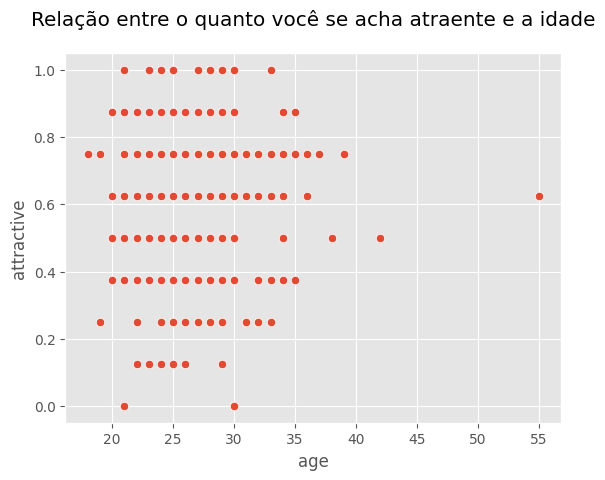

In [ ]:
sns.scatterplot(data=df, x='age', y='attractive')
plt.title("Relação entre o quanto você se acha atraente e a idade", pad=20)

In [ ]:
df = df.drop(df[df['met'] > 1].index)
df['met'].value_counts()

0.0    7644
1.0     351
Name: met, dtype: int64

- Tratamento missing data (Dados faltantes).
- Criação de  um objeto SimpleImputer com a estratégia da mediana.
- Ajuste e transformação dos valores NaN da coluna "age" usando o imputer.



In [ ]:

from sklearn.impute import SimpleImputer



imputer = SimpleImputer(strategy='median')

to_filter = ['importance_same_race', 'importance_same_religion', 'pref_o_attractive',
       'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny',
       'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o',
       'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
       'sincere_important', 'intellicence_important', 'funny_important',
       'ambtition_important', 'shared_interests_important', 'attractive',
       'sincere', 'intelligence', 'funny', 'ambition', 'attractive_partner',
       'sincere_partner', 'intelligence_partner', 'funny_partner',
       'ambition_partner', 'sports', 'yoga', 'expected_happy_with_sd_people',
       'like', 'guess_prob_liked', 'met', 'age', 'age_o',
       'shared_interests_partner']



for e in to_filter:
  df[e] = imputer.fit_transform(df[[e]])

Verificando os nulos que permaneceram nas colunas categóricas.

In [ ]:
df.isnull().sum()

importance_same_race               0
importance_same_religion           0
pref_o_attractive                  0
pref_o_sincere                     0
pref_o_intelligence                0
pref_o_funny                       0
pref_o_ambitious                   0
pref_o_shared_interests            0
attractive_o                       0
sinsere_o                          0
intelligence_o                     0
funny_o                            0
ambitous_o                         0
sincere_important                  0
intellicence_important             0
funny_important                    0
ambtition_important                0
shared_interests_important         0
attractive                         0
sincere                            0
intelligence                       0
funny                              0
ambition                           0
attractive_partner                 0
sincere_partner                    0
intelligence_partner               0
funny_partner                      0
a

- Criação de um objeto SimpleImputer com a estratégia da moda para tratar os valores categóricos.
- Ajuste e transformação dos valores ausentes em uma coluna categórica chamada "category".


In [ ]:
imputer = SimpleImputer(strategy='most_frequent')

filtered = ['race_o', 'field']



for e in filtered:
  df[e] = imputer.fit_transform(df[[e]])

Verificação para conferir se todos os dados faltantes foram tratados corretamente.

In [ ]:
df.isnull().sum()

importance_same_race               0
importance_same_religion           0
pref_o_attractive                  0
pref_o_sincere                     0
pref_o_intelligence                0
pref_o_funny                       0
pref_o_ambitious                   0
pref_o_shared_interests            0
attractive_o                       0
sinsere_o                          0
intelligence_o                     0
funny_o                            0
ambitous_o                         0
sincere_important                  0
intellicence_important             0
funny_important                    0
ambtition_important                0
shared_interests_important         0
attractive                         0
sincere                            0
intelligence                       0
funny                              0
ambition                           0
attractive_partner                 0
sincere_partner                    0
intelligence_partner               0
funny_partner                      0
a

In [ ]:
df['sports'].value_counts()

0.777778    1292
0.666667    1264
1.000000    1068
0.888889    1052
0.444444     857
0.555556     760
0.222222     679
0.333333     583
0.111111     468
0.000000     347
Name: sports, dtype: int64

In [ ]:
i = 0
for e in df['sports']:
  df['sports'][i] = round(e, 2)
  i = i + 1

<ipython-input-141-a414c0fcefe9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sports'][i] = round(e, 2)
<ipython-input-141-a414c0fcefe9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sports'][i] = round(e, 2)
<ipython-input-141-a414c0fcefe9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sports'][i] = round(e, 2)
<ipython-input-141-a414c0fcefe9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [ ]:
i = 0
for e in df['expected_happy_with_sd_people']:
  df['expected_happy_with_sd_people'][i] = round(e, 2)
  i = i + 1

<ipython-input-142-5caaab9f662b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['expected_happy_with_sd_people'][i] = round(e, 2)
<ipython-input-142-5caaab9f662b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['expected_happy_with_sd_people'][i] = round(e, 2)
<ipython-input-142-5caaab9f662b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['expected_happy_with_sd_people'][i] = round(e, 2)
<ipython-input-142-5caaab9f662b>:3

In [ ]:
df['expected_happy_with_sd_people'].value_counts()

0.56    2100
0.44    2031
0.67    1467
0.33     793
0.22     706
0.78     513
0.11     297
0.89     214
1.00     133
0.00     116
Name: expected_happy_with_sd_people, dtype: int64

In [ ]:
df['sports'].value_counts()

0.780000    1292
0.670000    1262
1.000000    1067
0.890000    1052
0.440000     855
0.560000     759
0.220000     679
0.330000     582
0.110000     467
0.000000     347
0.777778       8
Name: sports, dtype: int64

##EDA - II

###Analises iniciais com dados tratados

Nos gráficos abaixo, mostramos a relação entre a atratividade do parceiro e seus interesses intelectuais e culturais.

In [ ]:
df.columns

Index(['importance_same_race', 'importance_same_religion', 'pref_o_attractive',
       'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny',
       'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o',
       'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
       'sincere_important', 'intellicence_important', 'funny_important',
       'ambtition_important', 'shared_interests_important', 'attractive',
       'sincere', 'intelligence', 'funny', 'ambition', 'attractive_partner',
       'sincere_partner', 'intelligence_partner', 'funny_partner',
       'ambition_partner', 'sports', 'yoga', 'expected_happy_with_sd_people',
       'like', 'guess_prob_liked', 'gender', 'age', 'age_group', 'age_o',
       'd_age', 'race_o', 'samerace', 'field', 'shared_interests_partner',
       'met', 'match'],
      dtype='object')

No primeiro gráfico, temos a noção de que a sinceridade está muito relacionada com a atratividade do parceiro.

Text(0.5, 1.0, 'Relação entre a atratividadedo parceiro e a Sinceridade')

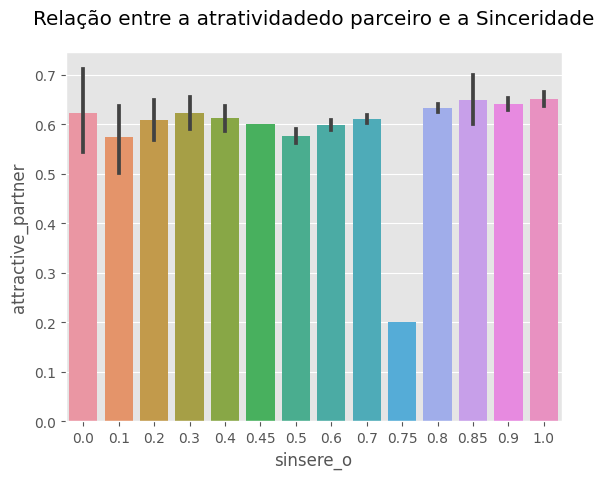

In [ ]:
sns.barplot(data=df, x='sinsere_o', y='attractive_partner')
plt.title("Relação entre a atratividadedo parceiro e a Sinceridade", pad=20)

Já em relação à variável Yoga, podemos ver o seu pico invertido, portanto os parceiros mais atrativos são os que não praticam Yoga, no entanto os parceiros que consideram yoga interessante, estão todos em um só pontno alto do eixo de y, mostrando que esses não necessariamente deixam de ser atrativos.

Text(0.5, 1.0, 'Relação entre a a atratividadedo parceiro e o interesse em yoga')

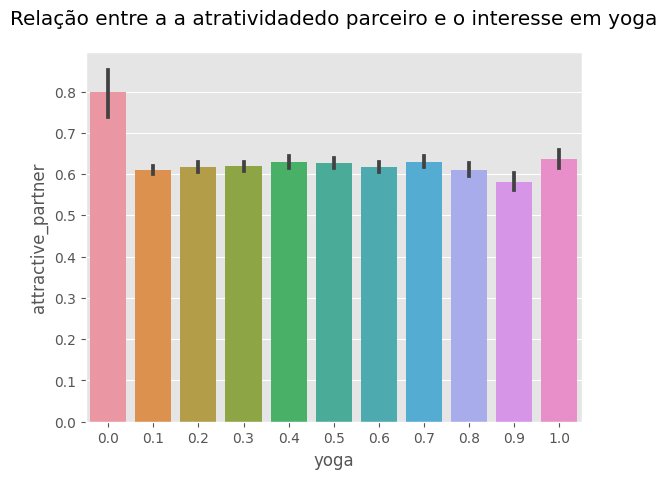

In [ ]:
sns.barplot(data=df, x='yoga', y='attractive_partner')
plt.title("Relação entre a a atratividadedo parceiro e o interesse em yoga", pad=20)

Já a relação com o interesse do parceiro em esportes, não  influencia na variável alvo, visto que todos os valores de 1 a 0 do eixo x estão próximos do ponto 0.6 do eixo y.

Text(0.5, 1.0, 'Relação entre a a atratividadedo parceiro e o interesse em sports')

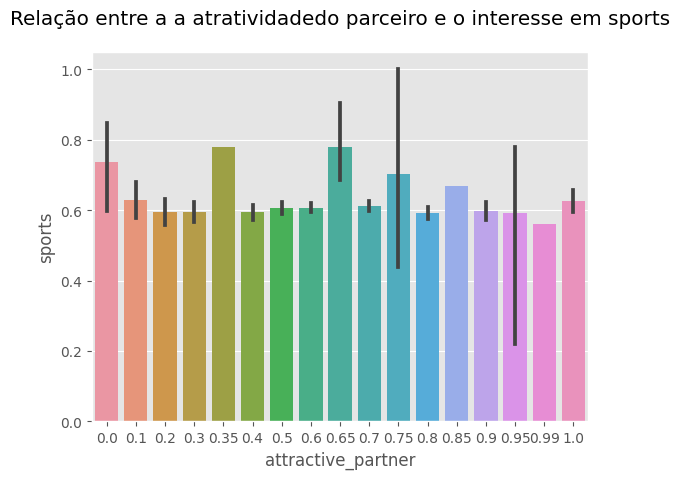

In [ ]:
sns.barplot(data=df, y='sports', x='attractive_partner')
plt.title("Relação entre a a atratividadedo parceiro e o interesse em sports", pad=20)

Criação de um vetor para facilitar a manipulação dos valores das variáveis em relação à variável alvo.

In [ ]:
temp = [
       'attractive_partner', 'like',
       'sincere_partner', 'intelligence_partner', 'funny_partner',
       'ambition_partner', 'sports', 'yoga', 'expected_happy_with_sd_people',
        'guess_prob_liked', 'met', 'gender', 'age',
       'race_o', 'samerace', 'field', 'shared_interests_partner', y]

Nos dois gráficos seguintes, evidenciamos a relação entre a atratividade do parceiro e a variável alvo, o "like" e após isso, mostramos a relação das idades, claramente concentrada em um único intervalo.

Text(0.5, 1.0, 'Relação entre o like e a atratividade do parceiro')

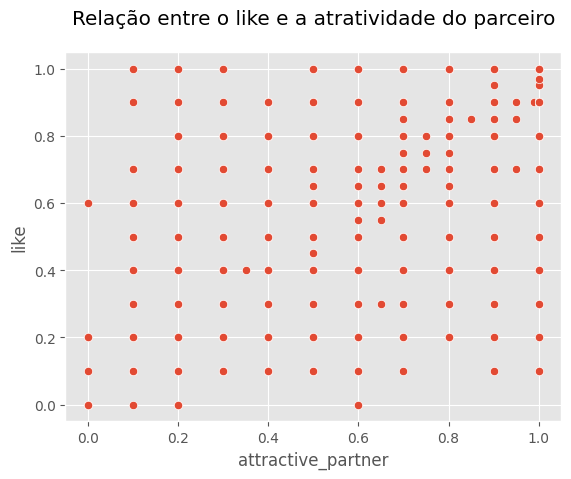

In [ ]:
sns.scatterplot(data=df, x='attractive_partner', y='like')
plt.title("Relação entre o like e a atratividade do parceiro", pad=20)

Text(0.5, 1.0, 'Evidenciando a concentração das idades')

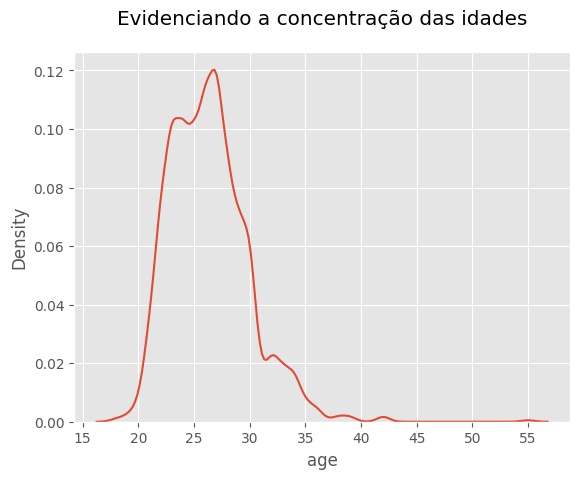

In [ ]:
sns.kdeplot(data=df, x='age')
plt.title("Evidenciando a concentração das idades", pad=20)

abaixo usamos um boxplot para, mais uma vez, mostrar a massificação da idade em um só ponto, mas ainda assim não é claro a existência de outliers.

Text(0.5, 1.0, 'Evidenciândo a concentração das idades')

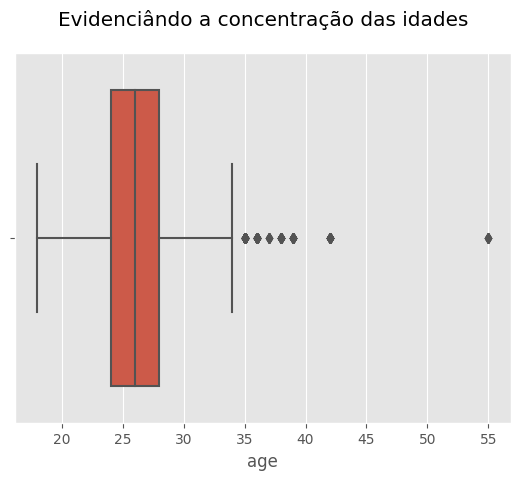

In [ ]:
sns.boxplot(data=df, x='age')
plt.title("Evidenciândo a concentração das idades", pad=20)

In [ ]:
df.describe()

,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,sports,yoga,expected_happy_with_sd_people,like,guess_prob_liked,age,age_o,d_age,shared_interests_partner,met
count,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000,8370.000000
mean,0.377467,0.293641,0.224675,0.290178,0.405358,0.349253,0.201417,0.394340,0.589098,0.716906,0.735627,0.584175,0.679779,0.290061,0.405276,0.349255,0.201326,0.394185,0.635424,0.786305,0.713441,0.771292,0.697835,0.618595,0.716870,0.735508,0.642413,0.679552,0.604164,0.433560,0.504876,0.612953,0.519803,26.357228,26.358901,4.185663,5.539486,0.041935
std,0.283233,0.310130,0.125070,0.116752,0.134960,0.120994,0.114867,0.210508,0.183418,0.171140,0.152396,0.174178,0.171660,0.116925,0.135056,0.121110,0.114860,0.210635,0.173438,0.174892,0.194411,0.153013,0.220997,0.192653,0.171196,0.152463,0.191626,0.171713,0.290851,0.270509,0.194170,0.181482,0.209018,3.546322,3.542141,4.597316,2.021429,0.200454
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,18.000000,0.000000,0.000000,0.000000
25%,0.100000,0.000000,0.150000,0.250000,0.353000,0.300000,0.094340,0.333333,0.476190,0.600000,0.700000,0.454545,0.600000,0.250000,0.353000,0.300000,0.094340,0.333333,0.500000,0.750000,0.625000,0.714286,0.625000,0.500000,0.600000,0.700000,0.500000,0.600000,0.440000,0.200000,0.440000,0.500000,0.400000,24.000000,24.000000,1.000000,4.000000,0.000000
50%,0.300000,0.222222,0.200000,0.306167,0.400000,0.360000,0.188679,0.354667,0.571429,0.700000,0.700000,0.636364,0.700000,0.303000,0.400000,0.360000,0.188679,0.354667,0.625000,0.750000,0.750000,0.714286,0.750000,0.600000,0.700000,0.700000,0.700000,0.700000,0.670000,0.400000,0.560000,0.600000,0.500000,26.000000,26.000000,3.000000,6.000000,0.000000
75%,0.600000,0.555556,0.250000,0.333333,0.465200,0.400000,0.283019,0.523000,0.761905,0.800000,0.800000,0.727273,0.800000,0.333333,0.465200,0.400000,0.283019,0.523000,0.750000,0.875000,0.875000,0.857143,0.875000,0.800000,0.800000,0.800000,0.800000,0.800000,0.890000,0.600000,0.670000,0.700000,0.700000,28.000000,28.000000,5.000000,7.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,55.000000,55.000000,37.000000,10.000000,1.000000


###Análise de correlação entre variáveis selecionadas e a atratividade

Com as relações entre a importância da mesma race e a importância da mesma religião, é possível definir que, para esses casos, ter a mesma raça é mais importante do que ter a mesma religião, algo que por si só, é problemático.

Text(0.5, 1.0, 'Densidade de pessoas que consideram importante ter a mesma raça')

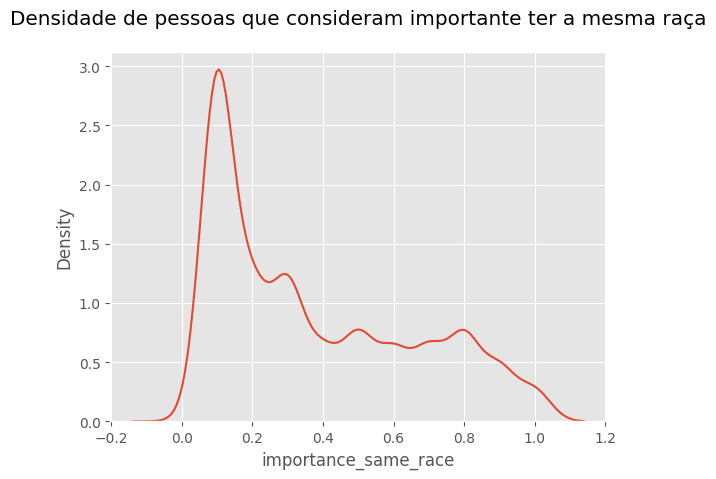

In [ ]:
sns.kdeplot(data=df, x='importance_same_race').set_title('Densidade de pessoas que consideram importante ter a mesma raça', pad=20)

Text(0.5, 1.0, 'Densidade de pessoas que consideram importante ter a mesma religião')

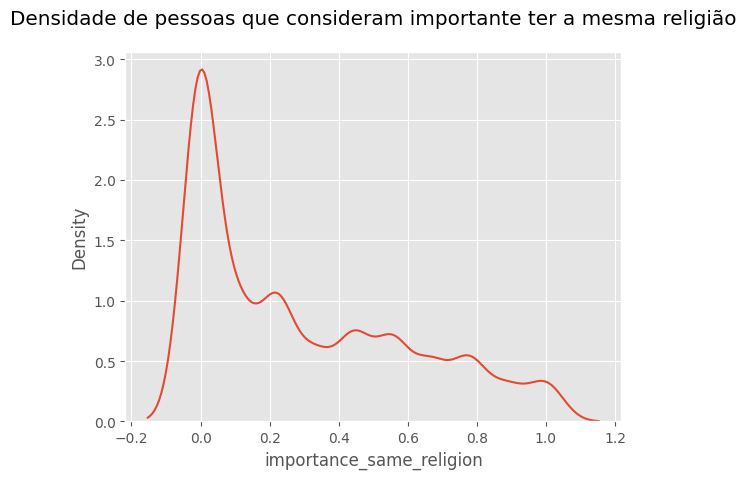

In [ ]:
sns.kdeplot(data=df, x='importance_same_religion').set_title('Densidade de pessoas que consideram importante ter a mesma religião', pad=20)

Text(0.5, 1.0, 'Densidade de pessoas que preferem que o parceiro seja atrativo')

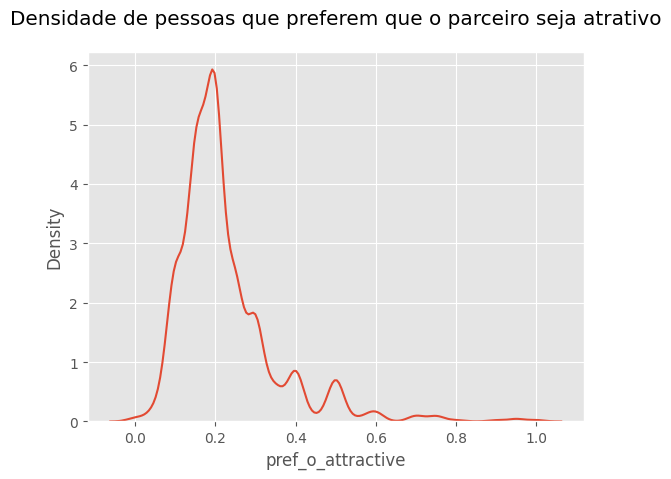

In [ ]:
sns.kdeplot(data=df, x='pref_o_attractive').set_title('Densidade de pessoas que preferem que o parceiro seja atrativo', pad=20)

Abaixo vêmos que, apesar de uma grande parte dos participantes não considerarem importante a atratividade, essas duas variáveis estão diretamente relacionadas.


Text(0.5, 1.0, 'Relação entre gostar e a atratividade do parceiro')

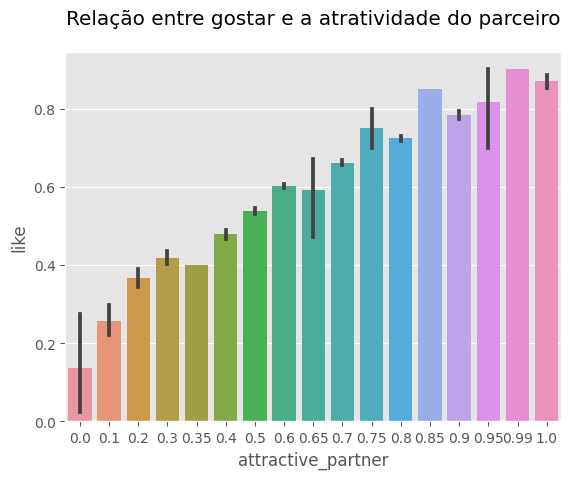

In [ ]:
sns.barplot(data=df, x='attractive_partner', y='like').set_title('Relação entre gostar e a atratividade do parceiro', pad=20)

plot com a concentração da variável "pref_o_intelligence" (Quão importante o parceiro considera a inteligência)

Text(0.5, 1.0, 'Evidenciândo a concentração da preferência de inteligência')

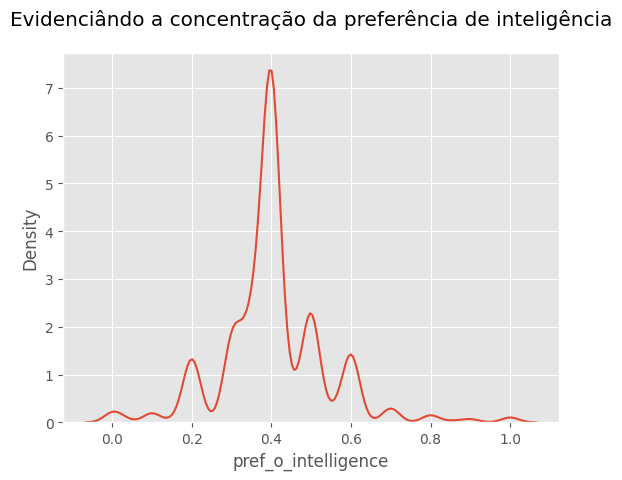

In [ ]:
sns.kdeplot(data=df, x='pref_o_intelligence')
plt.title("Evidenciândo a concentração da preferência de inteligência", pad=20)

A relação entre a atratividade do parceiro e sua inteligência, aparentam estar relacionadas diretamente, olhando o gráfico é clara a sua interação, porém não é estável, pois há pontos altos de x em que y decaí.

Text(0.5, 1.0, 'Relação entre a atratividade do parceiro e a inteligência do parceiro')

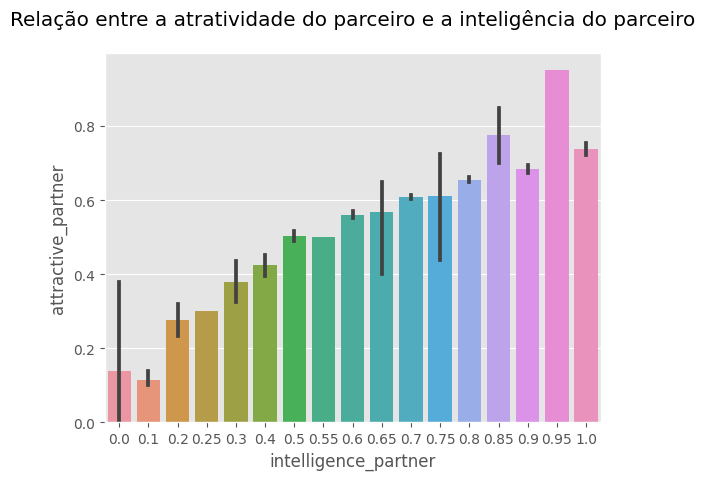

In [ ]:
sns.barplot(data=df, x='intelligence_partner', y='attractive_partner')
plt.title("Relação entre a atratividade do parceiro e a inteligência do parceiro", pad=20)

As relações entre características intelectuais do parceiro e a variável alvo like, são praticamente sempre correlacionadas, porém são nesses casos que pode-se visualizar possíveis outliers.

Text(0.5, 1.0, 'Relação entre o like e a inteligência do parceiro')

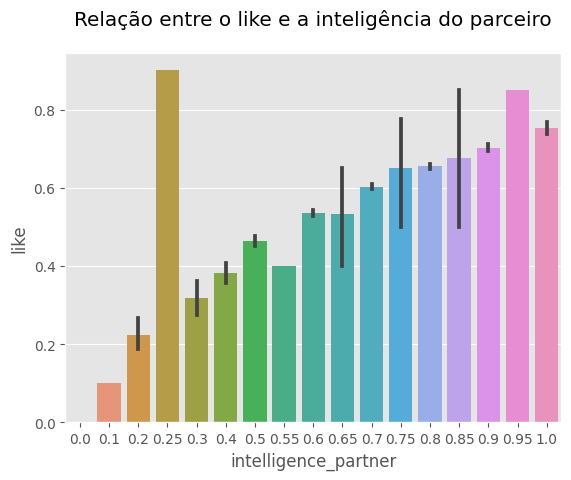

In [ ]:
sns.barplot(data=df, x='intelligence_partner', y='like')
plt.title("Relação entre o like e a inteligência do parceiro", pad=20)

###Relações entre aspectos intelectuais do parceiro e sua atratividade.

no gráfico abaixo, visualizamos uma das maiores e mais claras relações, em que quanto mais engraçado o parceiro, mais atraente ele consegue ser.

<Axes: xlabel='funny_partner', ylabel='like'>

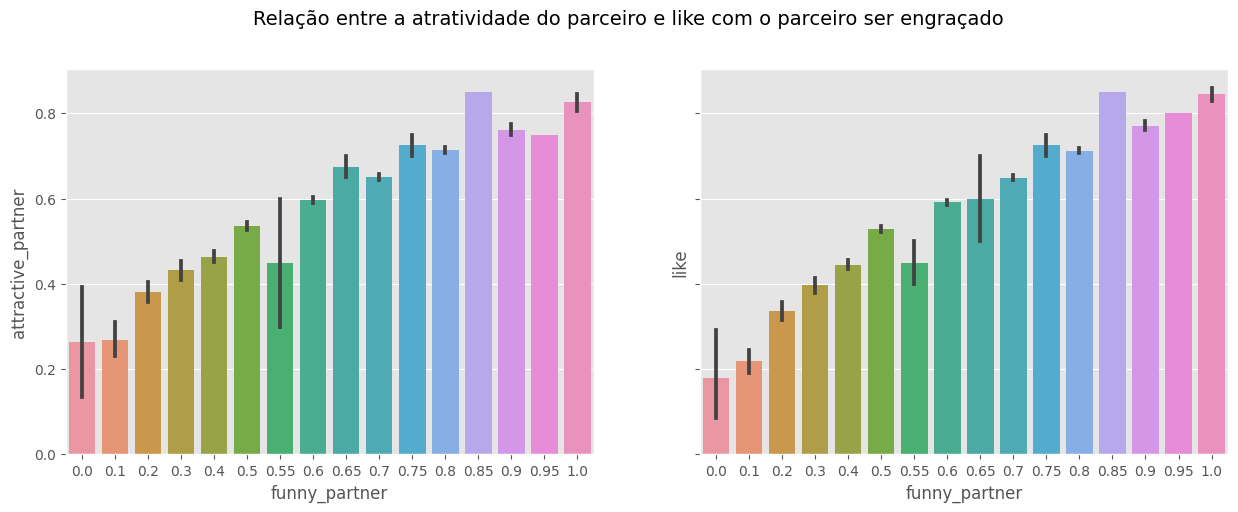

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle("Relação entre a atratividade do parceiro e like com o parceiro ser engraçado", fontsize=14, y=1)
sns.barplot(ax=axes[0],data=df, x=temp[4], y=temp[0])
sns.barplot(ax=axes[1],data=df, x=temp[4], y=temp[1])

A variável ambição, também se mostra um ponto relacionável, no entanto quando olhamos para os mesmos pontos em relação a variável engraçado, fica abaixo na corrrelação.

<Axes: xlabel='ambition_partner', ylabel='like'>

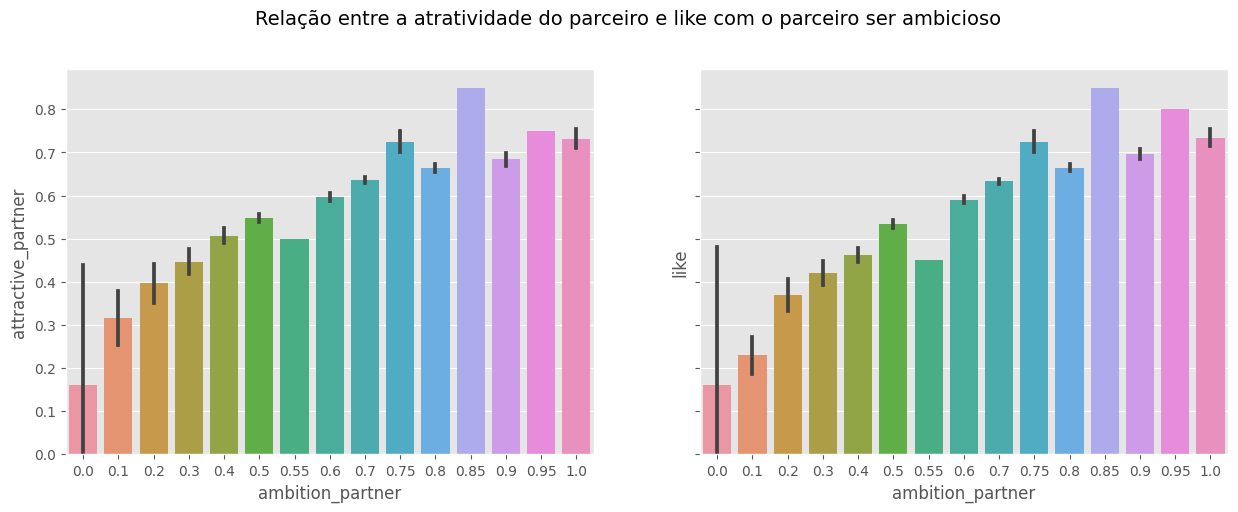

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle("Relação entre a atratividade do parceiro e like com o parceiro ser ambicioso", fontsize=14, y=1)
sns.barplot(ax=axes[0], data=df, x=temp[5], y=temp[0])
sns.barplot(ax=axes[1], data=df, x=temp[5], y=temp[1])

Em relação à prática de esportes, é algo quase intuitivo, mas ainda assim deixamos enfatizado abaixo a grande correlação com a atratividade.

<Axes: xlabel='sports', ylabel='like'>

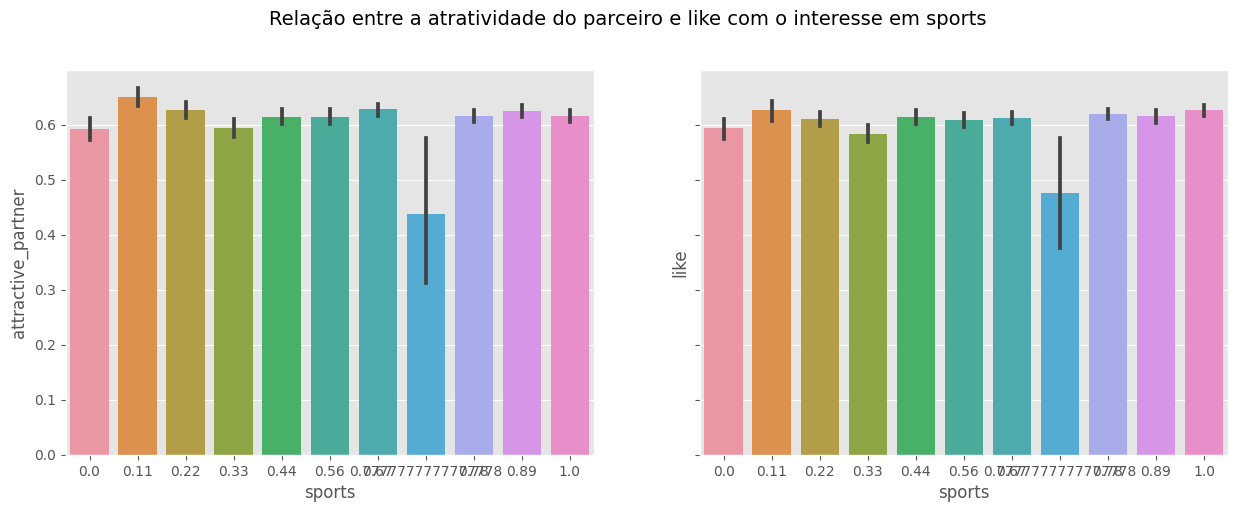

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle("Relação entre a atratividade do parceiro e like com o interesse em sports", fontsize=14, y=1)
sns.barplot(ax=axes[0], data=df, x=temp[6], y=temp[0])
sns.barplot(ax=axes[1], data=df, x=temp[6], y=temp[1])

Em relação ao yoga, temos um aspecto importante, pois seu pico é invertido considerando os demais pontos, dessa forma podemos  declarar que, com base nos dados, os parceiros mais atraentes são os não-praticantes de yoga.

<Axes: xlabel='yoga', ylabel='like'>

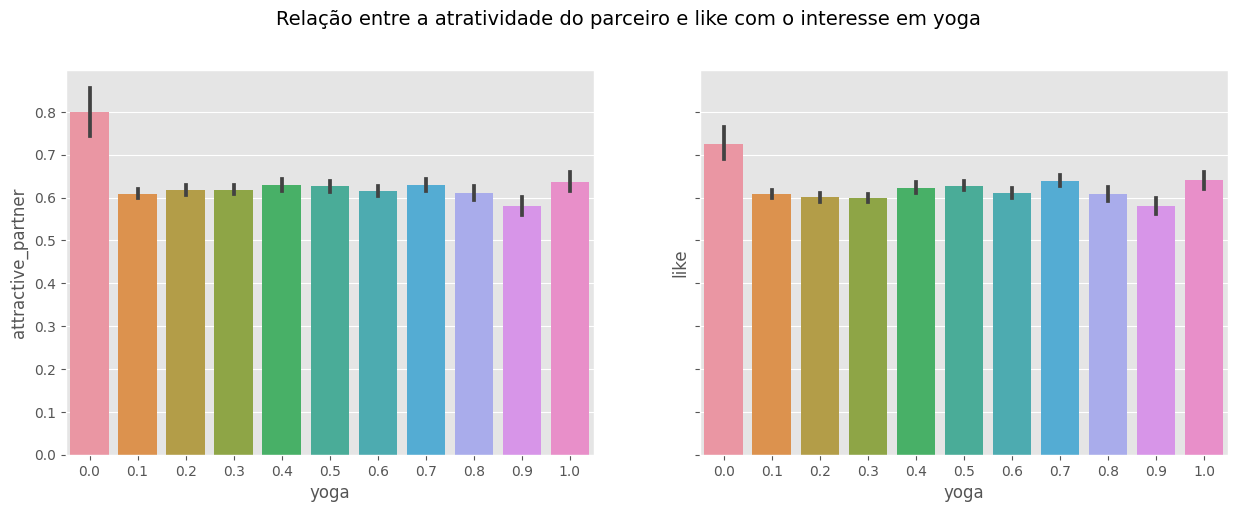

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle("Relação entre a atratividade do parceiro e like com o interesse em yoga", fontsize=14, y=1)
sns.barplot(ax=axes[0], data=df, x=temp[7], y=temp[0])
sns.barplot(ax=axes[1], data=df, x=temp[7], y=temp[1])

Nesse gráfico, temos uma correlação com a variável "expected_happy_with_sd_people" onde nos mostra que, independente se o parceiro aparenta oferecer uma relação mais saúdavel, não interfere em sua atratividade.

<Axes: xlabel='expected_happy_with_sd_people', ylabel='like'>

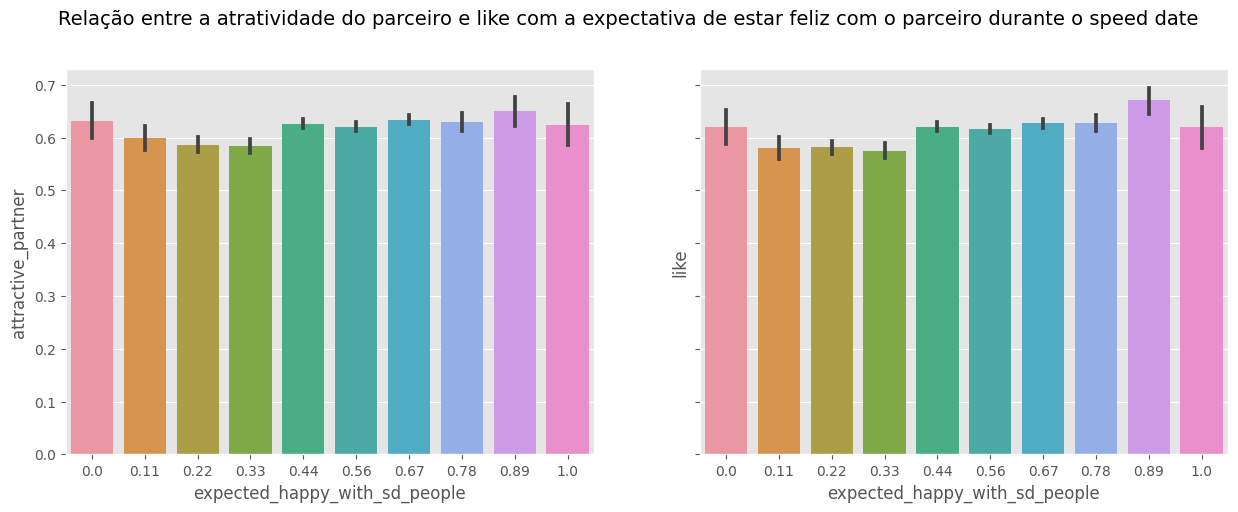

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle("Relação entre a atratividade do parceiro e like com a expectativa de estar feliz com o parceiro durante o speed date", fontsize=14, y=1)
sns.barplot(ax=axes[0], data=df, x=temp[8], y=temp[0])
sns.barplot(ax=axes[1], data=df, x=temp[8], y=temp[1])

Na correlação entre gostar do parceiro e a probabilidade do parceiro ter gostado, evidenciamos uma progressão, contudo com uma queda abrupta no valor de 0,15. Tendo como resultado que quando maior a expectativa de que o seu parceiro goste de você mais gostará dele.

<Axes: title={'center': 'Relação entre o like a probalidade que você acha que o seu parceiro vai gostar de você'}, xlabel='guess_prob_liked', ylabel='like'>

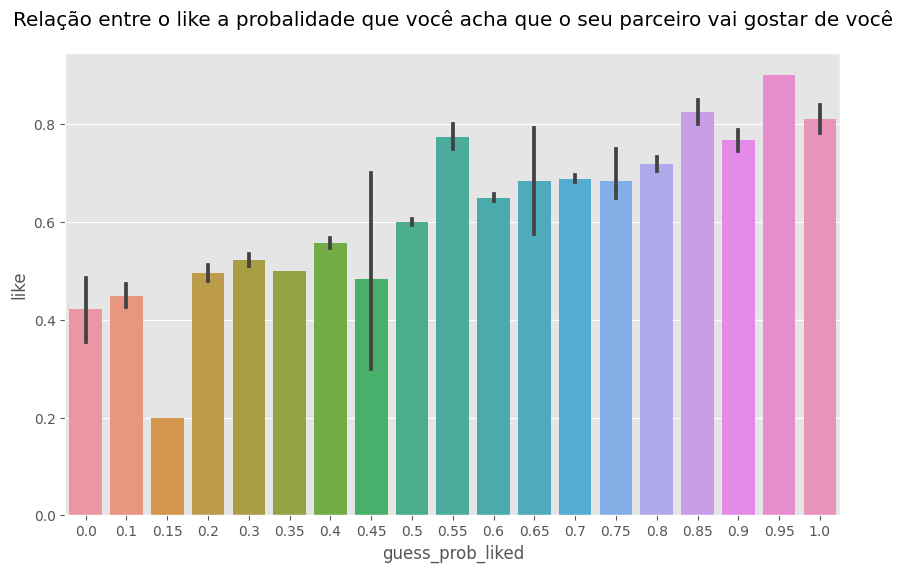

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Relação entre o like a probalidade que você acha que o seu parceiro vai gostar de você", pad=20)
sns.barplot(data=df, x=temp[9], y=temp[1])

Se os parceiros já se encontraram, a atratividade tende a ser maior, valendo quase que o mesmo para gostar do parceiro.

<Axes: xlabel='met', ylabel='like'>

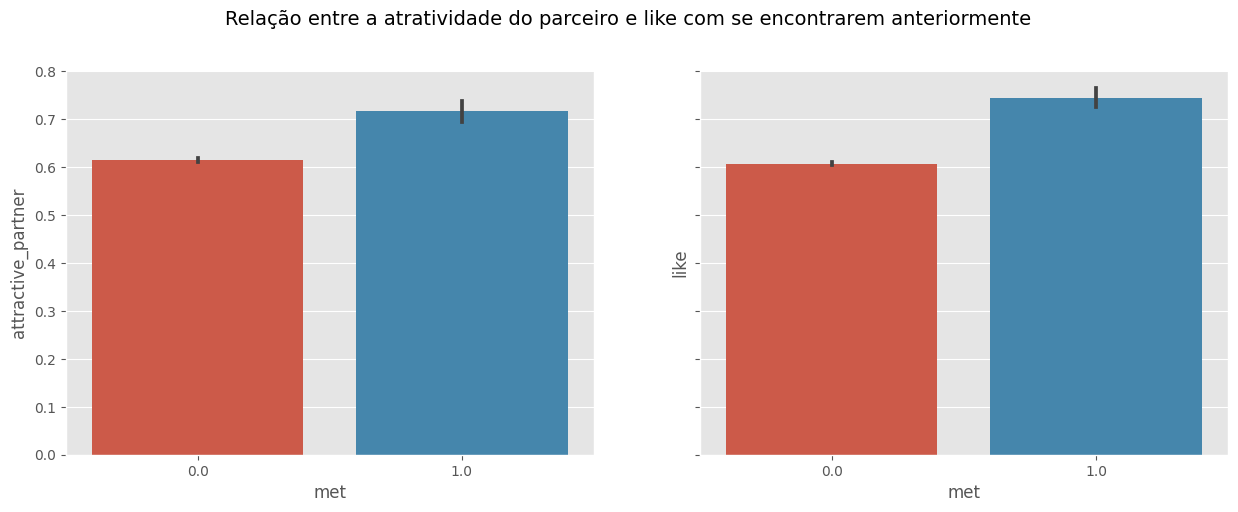

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle("Relação entre a atratividade do parceiro e like com se encontrarem anteriormente", fontsize=14, y=1)
sns.barplot(ax=axes[0], data=df, x=temp[10], y=temp[0])
sns.barplot(ax=axes[1], data=df, x=temp[10], y=temp[1])

No barplot abaixo, relacionamos a atratividade do parceiro e o gênero de quem avalia, evidenciando que, em geral o gênero masculino considera a parceira pouco mais atraente, valendo quase que o mesmo para gostar do parceiro.

<Axes: xlabel='gender', ylabel='like'>

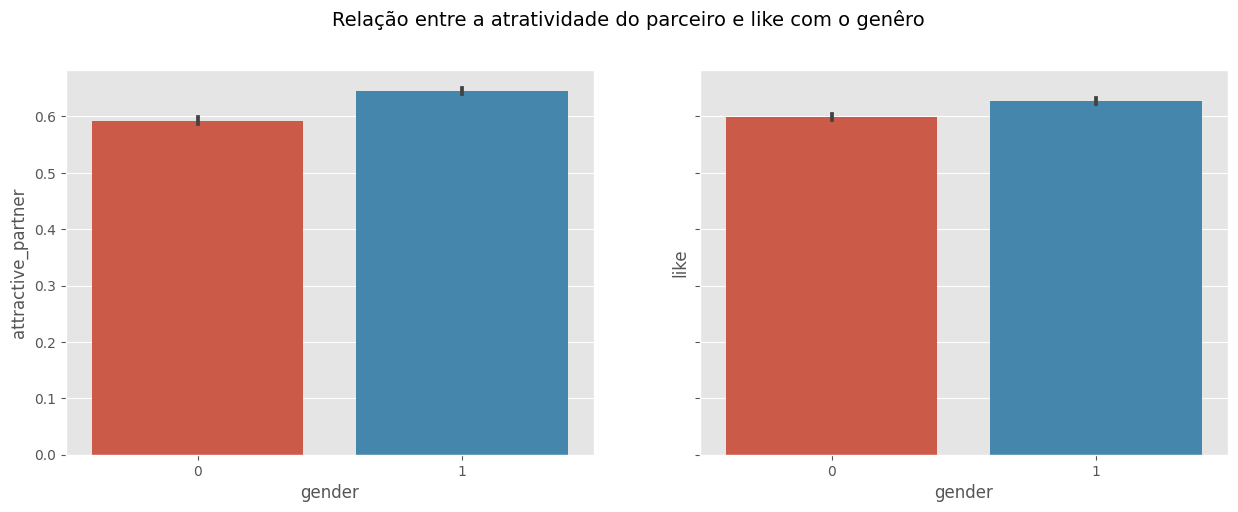

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle("Relação entre a atratividade do parceiro e like com o genêro", fontsize=14, y=1)
sns.barplot(ax=axes[0], data=df, x=temp[11], y=temp[0])
sns.barplot(ax=axes[1], data=df, x=temp[11], y=temp[1])

A coluna que define a raça do parceiro está relacionada com a atratividade dele, porém não há uma diferença significativa entre as raças, visto que todas estão próximas da linha de 0.6 pontos, valendo quase que o mesmo para gostar do parceiro.

<Axes: xlabel='like', ylabel='race_o'>

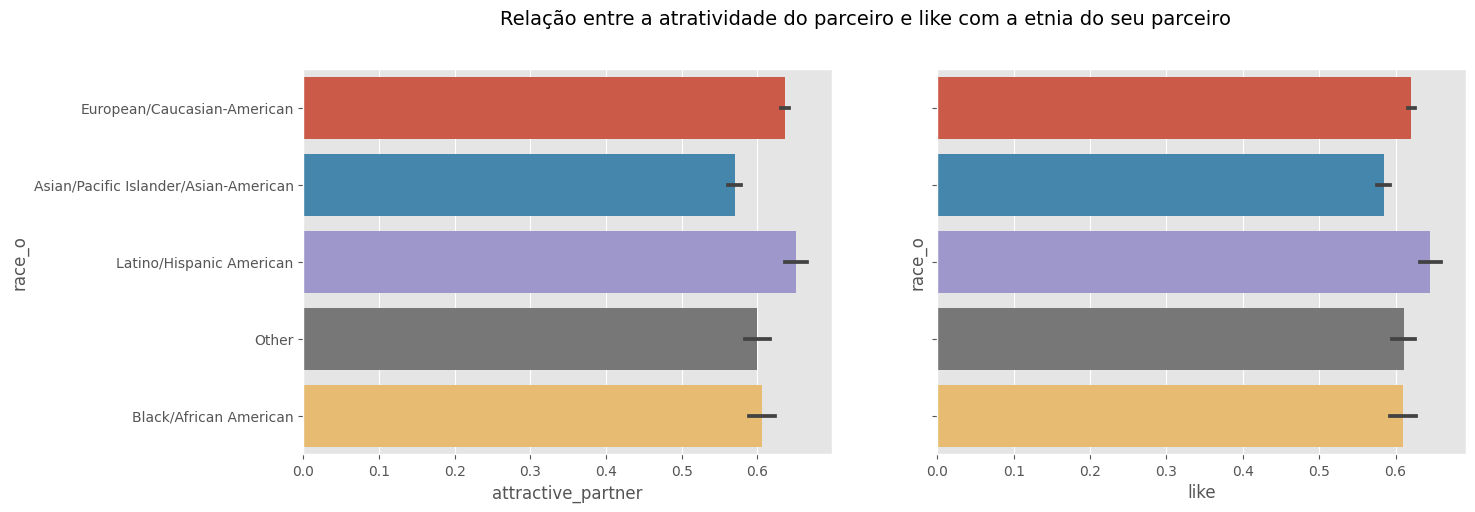

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle("Relação entre a atratividade do parceiro e like com a etnia do seu parceiro", fontsize=14, y=1)
sns.barplot(ax=axes[0], data=df, x=temp[0], y=temp[13])
sns.barplot(ax=axes[1], data=df, x=temp[1], y=temp[13])

No gráfico abaixo podemos ver mais claramente que a diferença de raça não influencia diretamente em sua atratividade, mostrando que tendo a mesma raça ou não, a atratividade é a mesma, valendo quase que o mesmo para gostar do parceiro.

<Axes: xlabel='samerace', ylabel='like'>

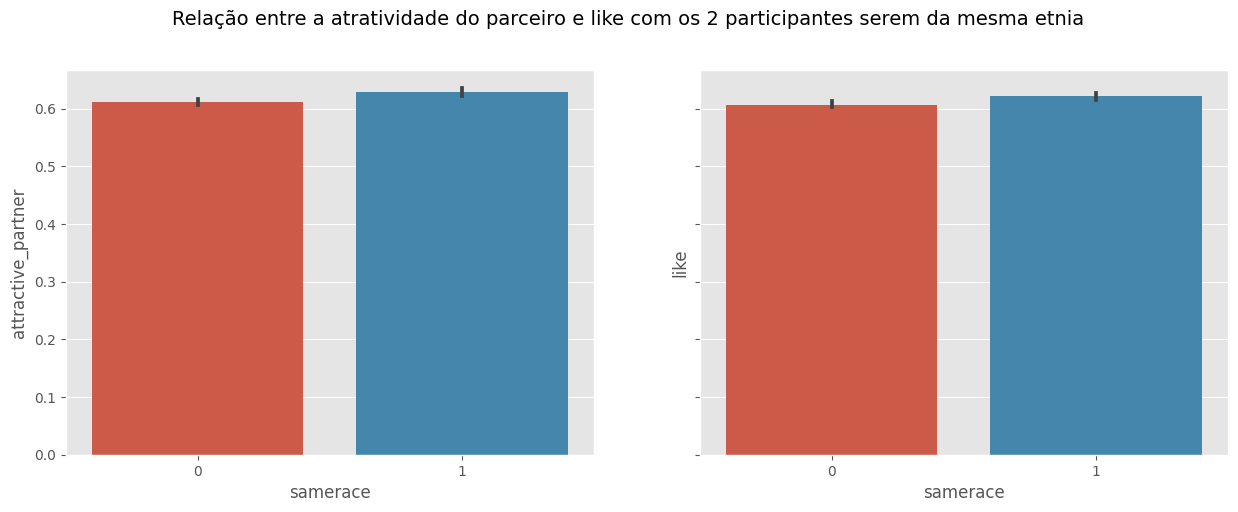

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle("Relação entre a atratividade do parceiro e like com os 2 participantes serem da mesma etnia", fontsize=14, y=1)
sns.barplot(ax=axes[0], data=df, x=temp[14], y=temp[0])
sns.barplot(ax=axes[1], data=df, x=temp[14], y=temp[1])

Ao correlacionar a atratividade do parceiro com os interesses compartilhados, declaramos uma grande correlação, visto que claramente quanto maior os interesses compartilhados, mais atraente o parceiro será considerado, valendo quase que o mesmo para gostar do parceiro.

<Axes: xlabel='shared_interests_partner', ylabel='like'>

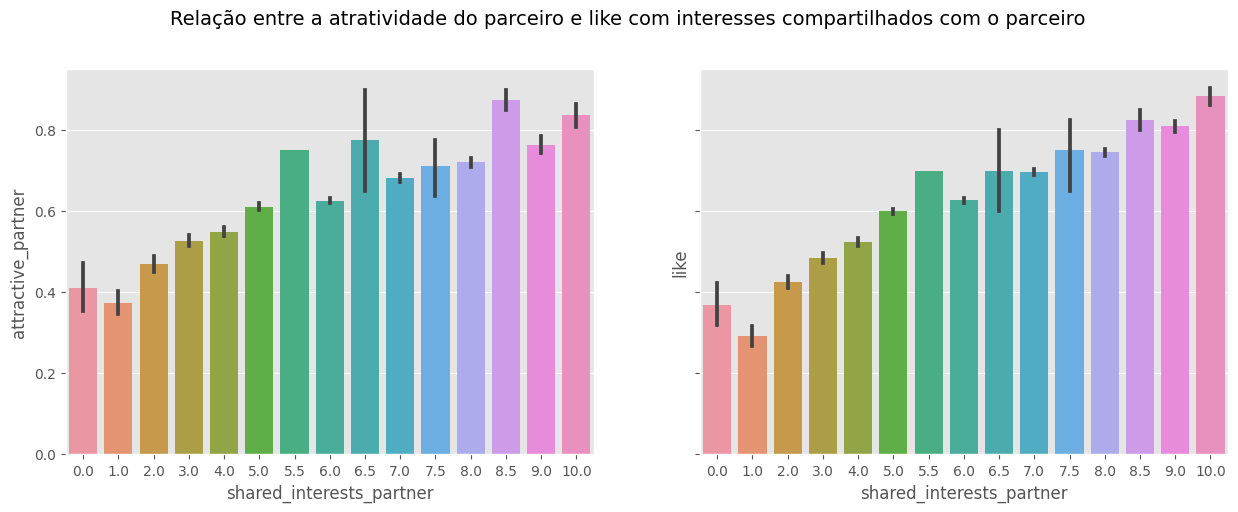

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle("Relação entre a atratividade do parceiro e like com interesses compartilhados com o parceiro", fontsize=14, y=1)
sns.barplot(ax=axes[0], data=df, x=temp[16], y=temp[0])
sns.barplot(ax=axes[1], data=df, x=temp[16], y=temp[1])

Com o quão importante o parceiro considera importante a atratividade, há uma relação entre os intervalos de idades, definindo que as idades mais novas acham a atratividade um ponto importante, quando comparado com o grupo mais velho.

Text(0.5, 1.0, 'Relação entre a preferência de atratividade e a faixa etária')

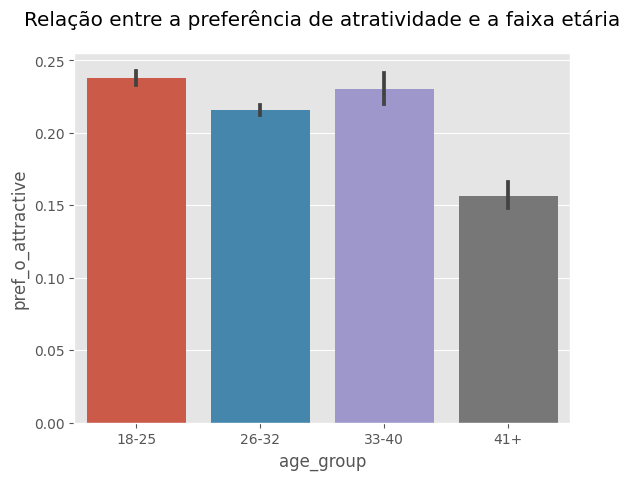

In [ ]:
sns.barplot(data=df, x='age_group', y='pref_o_attractive')
plt.title("Relação entre a preferência de atratividade e a faixa etária", pad=20)

Finalizando as relações temos que os grupos mais jovens que 40 anos se consideram mais atrantes que os mais velhos, tendo seu ápice entre as idades de 26 e 32 anos, onde se encontram o maior número de avaliados.

Text(0.5, 1.0, 'Relação entre o quanto você se considera atrativo e a faixa etária')

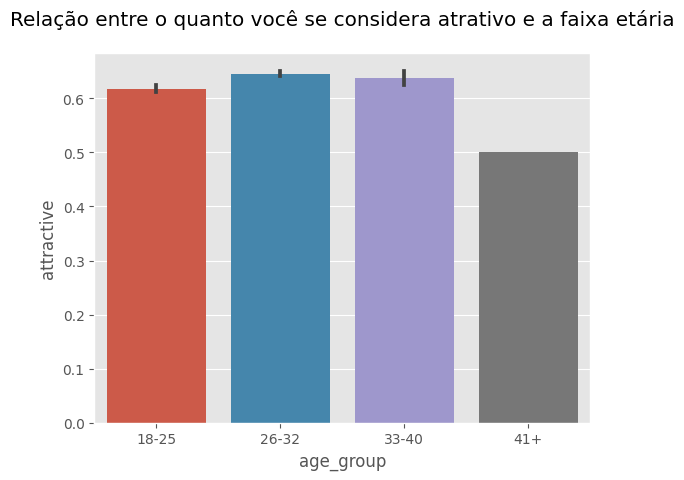

In [ ]:
sns.barplot(data=df, x='age_group', y='attractive')
plt.title("Relação entre o quanto você se considera atrativo e a faixa etária", pad=20)

Qual faixa etário recebeu a maior maior nota quanto a sua atratividade

Text(0.5, 1.0, 'Relação entre o quanto o seu parceiro te achou atraente e a faixa etária')

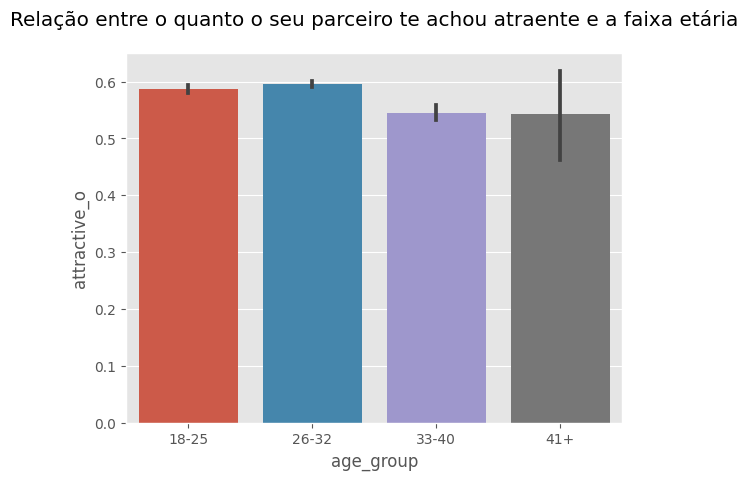

In [ ]:
sns.barplot(data=df, x='age_group', y='attractive_o')
plt.title("Relação entre o quanto o seu parceiro te achou atraente e a faixa etária", pad=20)

Em contra partida, vemos que grupos etários mais novos não consideram seus parceiors tão atraentes, um dos possíveis motivos é o ego e maior exigência de idade, já os grupos mais velhos, mostraram menor nível de exigência ao relatar que seus parceiros eram mais atrativos.

Text(0.5, 1.0, 'Relação entre o quanto eu achei o meu parceiro atraente e a faixa etária')

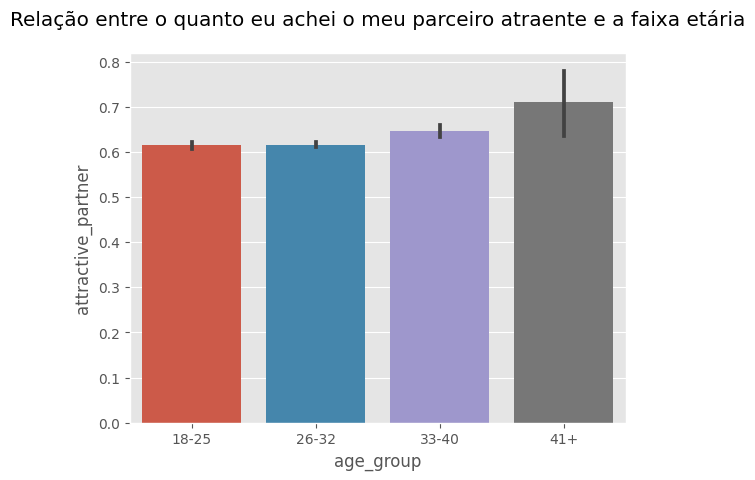

In [ ]:
sns.barplot(data=df, x='age_group', y='attractive_partner')
plt.title("Relação entre o quanto eu achei o meu parceiro atraente e a faixa etária", pad=20)

In [ ]:
df = pd.concat([df, y], axis=1)

In [ ]:
df['match']

,match,match
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0
6,0,0
7,0,0
8,1,1
9,0,0


Visualização dos dados da variável-alvo 'match'.

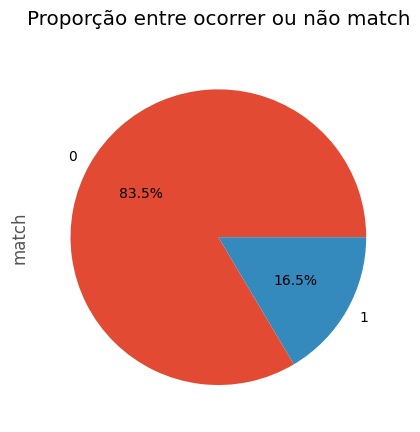

In [ ]:
# Contar a ocorrência de cada valor da variável 'match'
contagem = y.value_counts()
contagem.plot(kind='pie', autopct='%1.1f%%')
plt.title("Proporção entre ocorrer ou não match", pad=20)
plt.show()

Text(0.5, 1.0, 'Relação entre a Importância da inteligência e Match')

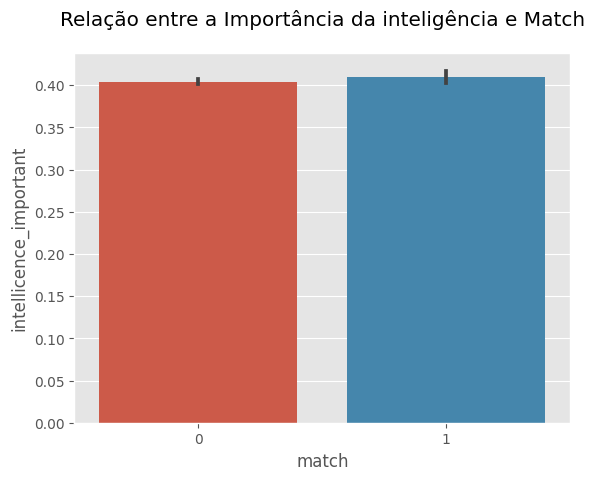

In [ ]:
sns.barplot(data=df, x=y, y= 'intellicence_important')
plt.title("Relação entre a Importância da inteligência e Match", pad=20)
#como podemos ver não para dar match não é necessário ser inteligente

Text(0.5, 1.0, 'Relação entre a Nota que você deu a atratividade do seu parceiro e Match')

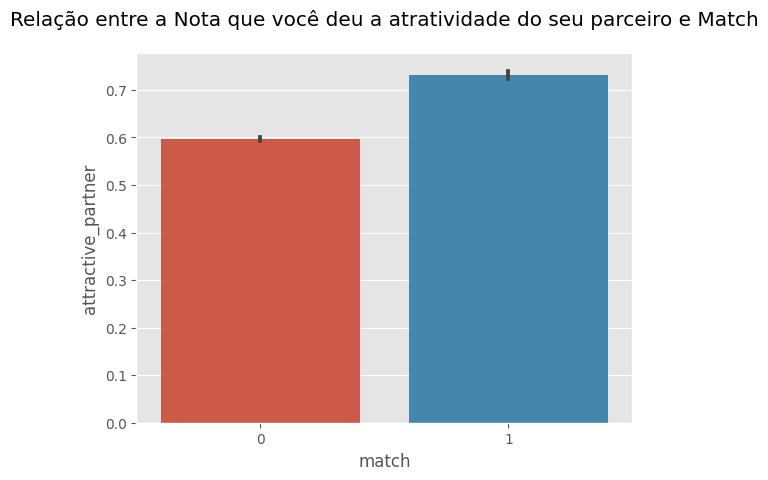

In [ ]:
sns.barplot(data=df, x= y, y='attractive_partner')
plt.title("Relação entre a Nota que você deu a atratividade do seu parceiro e Match", pad=20)
#Podemos notar que quanto mais atrativo é o parceiro maior também se encontra o índice de encontro

Text(0.5, 1.0, 'Relação entre seu interesse em sports e o Match  ')

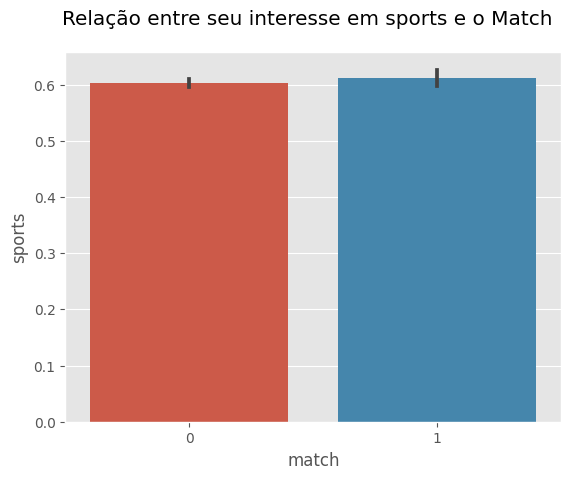

In [ ]:
sns.barplot(data=df, y='sports', x=y)
plt.title("Relação entre seu interesse em sports e o Match  ", pad=20)
#Como mostrado no gráfico, a nota dada para sports não interfere no Match

Text(0.5, 1.0, 'Relação entre Idade e o Match ')

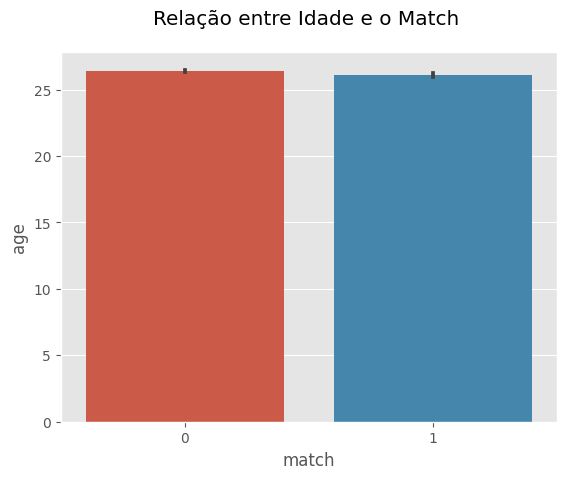

In [ ]:
sns.barplot(data=df, y='age', x=y)
plt.title("Relação entre Idade e o Match ", pad=20)
#Com esse gráfico vimos que a idade não limita o resultado do Match

Text(0.5, 1.0, 'Relação entre like e o Match  ')

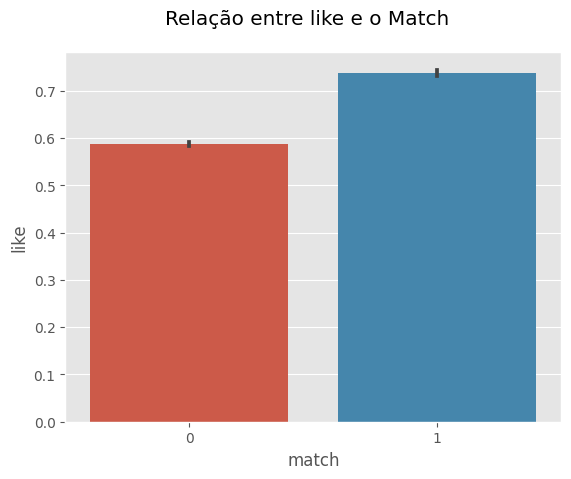

In [ ]:
sns.barplot(data=df, y='like', x=y)
plt.title("Relação entre like e o Match  ", pad=20)
#Já o like afeta diretamente no resultado do Match tendendo a ser positivo quando gostam do seu parceiro(like)

Text(0.5, 1.0, 'Relação entre a importância da sinceridade e o Match  ')

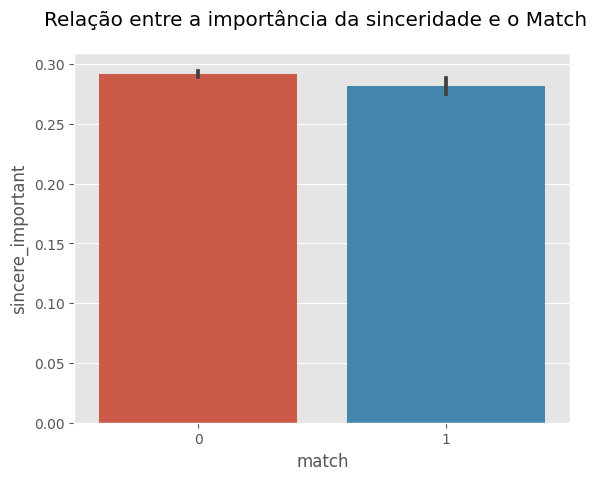

In [ ]:
sns.barplot(data=df, y='sincere_important', x=y)
plt.title("Relação entre a importância da sinceridade e o Match  ", pad=20)
#Aparentemente por uma pequena quantidade quanto mais a pessoa acha importante o parceiro ser sincero eles não dão Match

Text(0.5, 1.0, 'Relação entre a importância do parceiro ser engraçado e o Match  ')

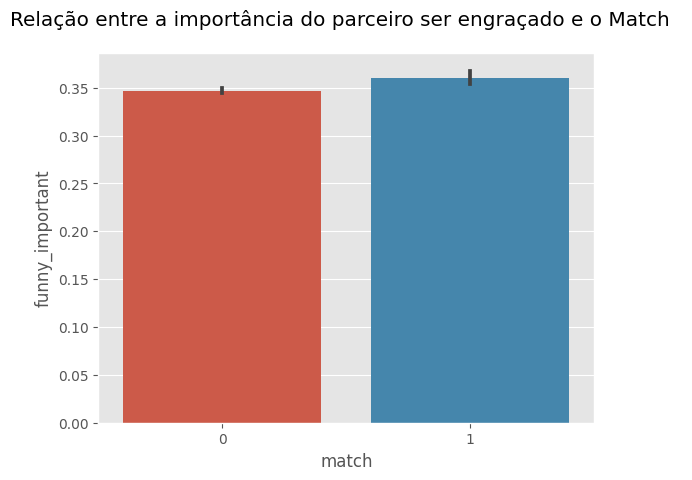

In [ ]:
sns.barplot(data=df, y='funny_important', x=y)
plt.title("Relação entre a importância do parceiro ser engraçado e o Match  ", pad=20)
#como no gráfico anterior por uma pequena quantidade o Match tende a ser positivo quando a pessoa acha importante o parceiro ser engraçado

Text(0.5, 1.0, 'Relação entre a importância do seu parceiro ser ambicioso e o Match')

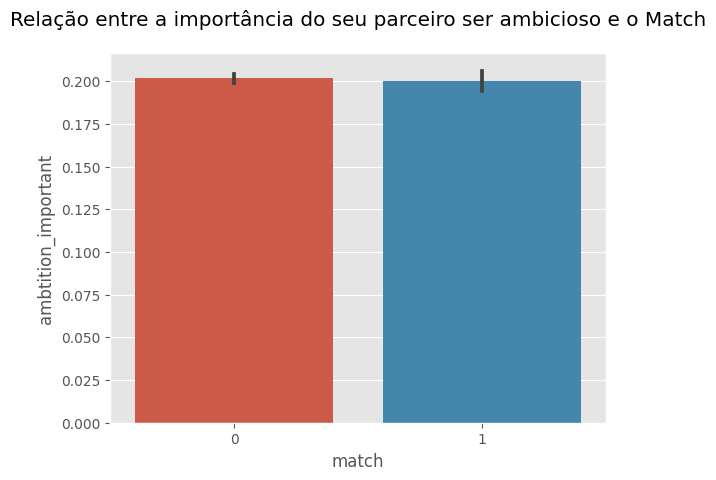

In [ ]:
sns.barplot(data=df, y='ambtition_important', x=y)
plt.title("Relação entre a importância do seu parceiro ser ambicioso e o Match", pad=20)
#A importância do parceiro ser ambicioso não interfere no resultado do Match

Text(0.5, 1.0, 'Relação entre a expectativa de estar feliz com o parceiro durante o speed date e o Match  ')

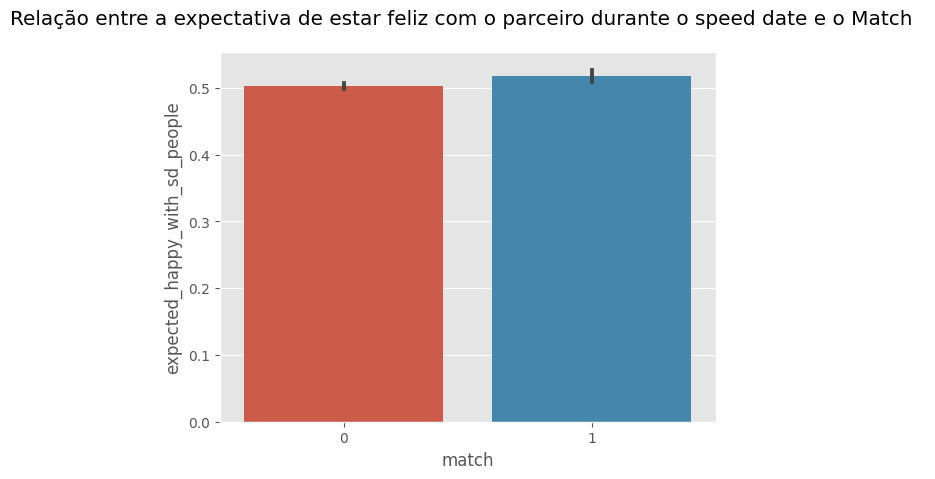

In [ ]:
sns.barplot(data=df, y='expected_happy_with_sd_people', x=y)
plt.title("Relação entre a expectativa de estar feliz com o parceiro durante o speed date e o Match  ", pad=20)
#Por uma pequena margem quem tem altas expectativas pode afetar positivamente o resultado do Match

Text(0.5, 1.0, 'Relação entre a probabilidade que você acha que o seu parceiro vai gostar de você e o Match')

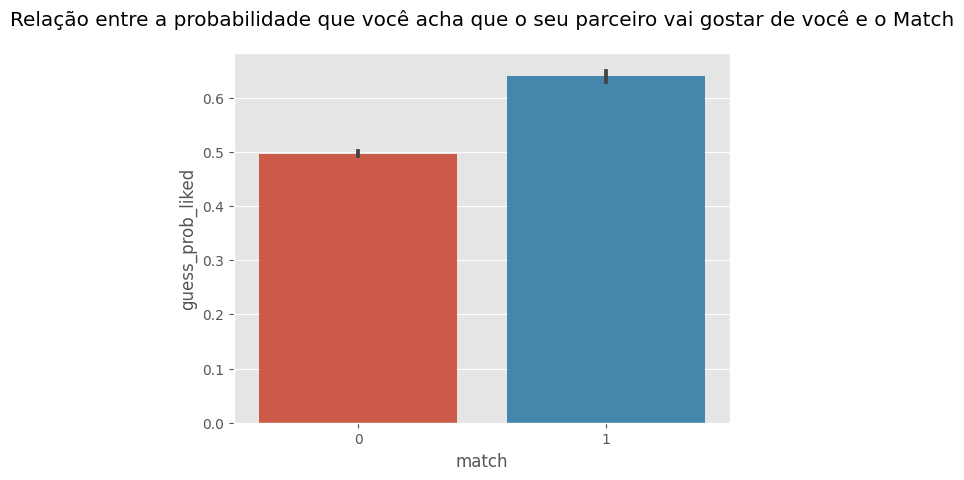

In [ ]:
sns.barplot(data=df, y='guess_prob_liked', x=y)
plt.title("Relação entre a probabilidade que você acha que o seu parceiro vai gostar de você e o Match", pad=20)
#Podemos ver claramente que aqueles que tem mais confiança e acham que vao gostar do seu parceiro tambem tem mais match

Text(0.5, 1.0, 'Relação entre se você ja encontrou seu parceiro anteriormente e o Match  ')

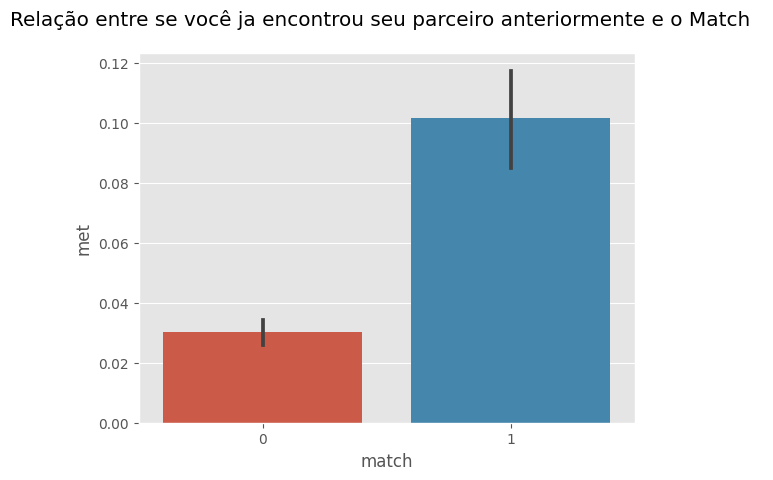

In [ ]:
sns.barplot(data=df, y='met', x=y)
plt.title("Relação entre se você ja encontrou seu parceiro anteriormente e o Match  ", pad=20)
#Como podemos ver pessoas que ja se encontraram anteriormente tem uma grande chance de dar match com o outro

Text(0.5, 1.0, 'Relação entre a importancia do parceiro ser da mesma etnia e o Match  ')

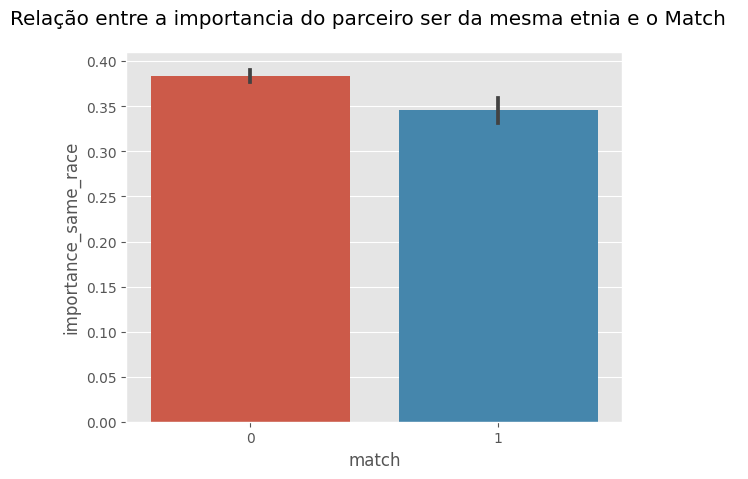

In [ ]:
sns.barplot(data=df, y='importance_same_race', x=y)
plt.title("Relação entre a importancia do parceiro ser da mesma etnia e o Match  ", pad=20)
#Como podemos ver quem considera muito importânte ser da mesma etnia acaba resultando em menos match

Text(0.5, 1.0, 'Relação entre a importancia do parceiro ser da mesma religião e o Match  ')

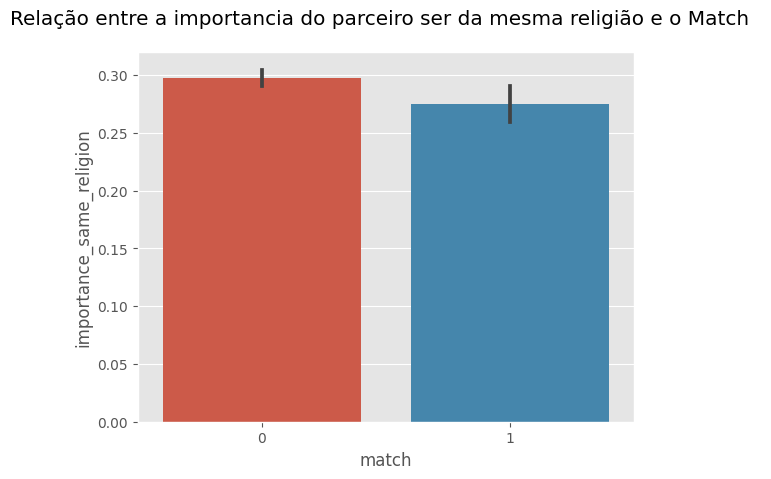

In [ ]:
sns.barplot(data=df, y='importance_same_religion', x=y)
plt.title("Relação entre a importancia do parceiro ser da mesma religião e o Match  ", pad=20)
#Como o gráfico anterior podemos ver quem considera muito importânte ser da mesma religião acaba resultando em menos match

Text(0.5, 1.0, 'Relação entre a importancia do parceiro ter os mesmos interesses e o Match  ')

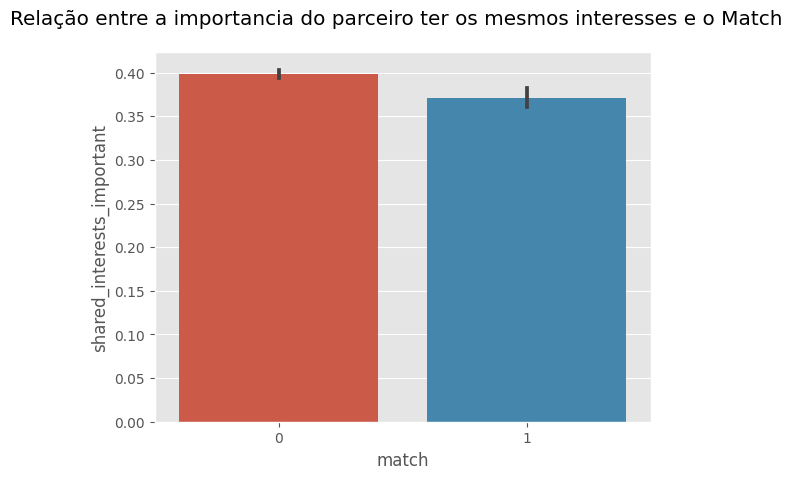

In [ ]:
sns.barplot(data=df, y='shared_interests_important', x=y)
plt.title("Relação entre a importancia do parceiro ter os mesmos interesses e o Match  ", pad=20)
#Como nos gráfico anterior podemos ver quem considera importânte ter os mesmos interesses acaba resultando em menos match